Introduction How to use this jupyter notebook
- Ensure your data files (sp500_close.csv and economic_indicators.csv) are correctly formatted and located in the specified paths. !!!Don't forget to change path of your file!!!
- Ensure you have the required libraries installed. You can install the necessary packages using pip.
- If you want to change the stock you can choose the stock name in sp500_close.csv file and change it. EX:In the notebook, wherever 'AAPL' is mentioned, change it to 'GOOGL' or your desired stock's column name.

Import Libraries

In [1]:
# Install necessary libraries
%pip install numpy==1.26.4
%pip install pandas matplotlib seaborn statsmodels scikit-learn pmdarima ipywidgets
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")



Load the Dataset

In [2]:
# Load the dataset, parse the date column, and set it as the index
data = pd.read_csv(r'C:/P@i/Time Series Forecasting Assignment/sp500_close.csv', parse_dates=['Date'], index_col='Date')
data.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
8/2/2013,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
9/2/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/2/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/2/2013,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
12/2/2013,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


EDA

Dataset dimensions: (1826, 505)
<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 8/2/2013 to 7/2/2018
Columns: 505 entries, AAL to ZTS
dtypes: float64(505)
memory usage: 7.0+ MB
None
               AAL         AAPL          AAP        ABBV          ABC  \
count  1259.000000  1259.000000  1259.000000  1259.00000  1259.000000   
mean     38.393252   109.066698   132.433463    60.86444    82.092979   
std      10.957636    30.556812    31.274463    13.73038    16.315690   
min      13.020000    55.789900    76.180000    35.27000    46.180000   
25%      34.330000    84.830650   104.440000    52.65000    70.525000   
50%      40.870000   109.010000   141.300000    60.17000    82.560000   
75%      46.535000   127.120000   156.730000    65.74500    92.520000   
max      58.470000   179.260000   200.380000   123.21000   115.480000   

               ABT          ACN         ADBE          ADI          ADM  ...  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000

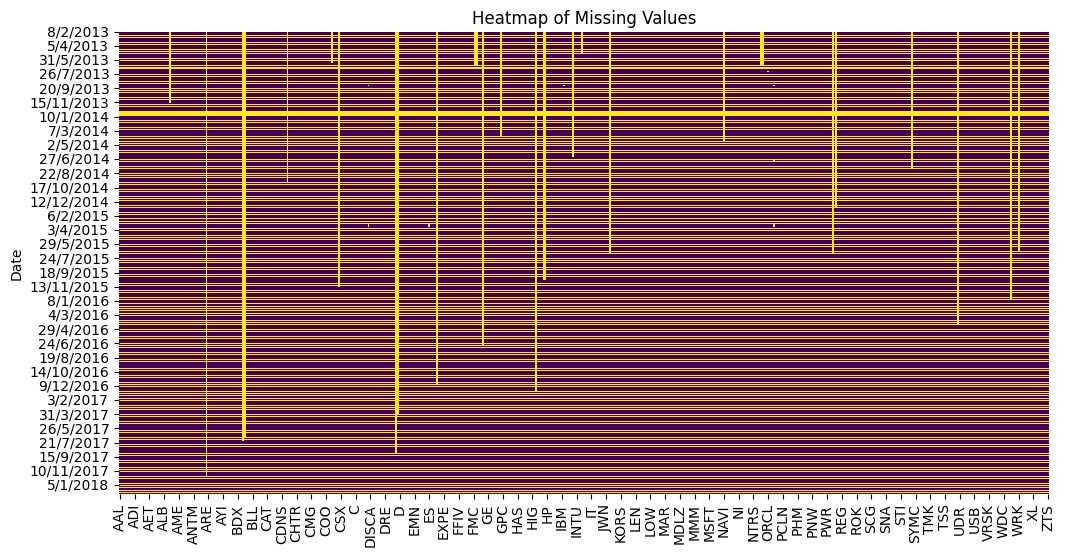

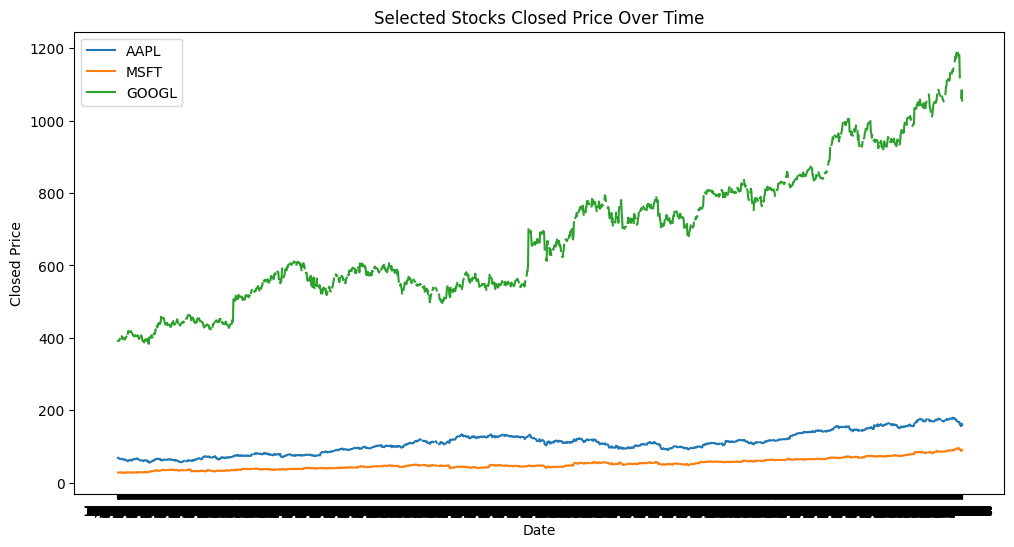

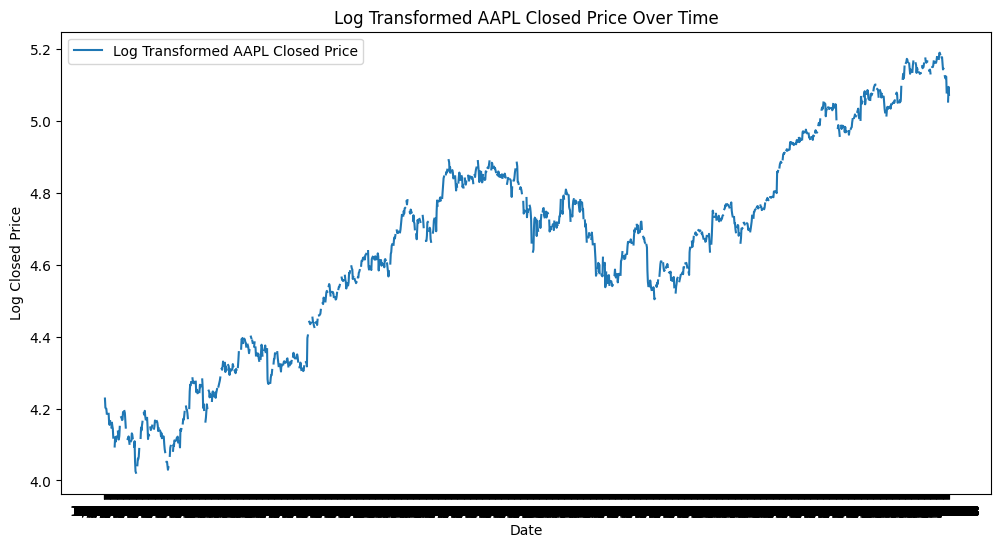

In [3]:
# EDA: Understanding the Data Structure
print(f"Dataset dimensions: {data.shape}")
print(data.info())
print(data.describe())

# EDA: Identifying Missing Values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# EDA: Plotting the Time Series
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'], label='AAPL')
plt.plot(data['MSFT'], label='MSFT')
plt.plot(data['GOOGL'], label='GOOGL')
plt.title('Selected Stocks Closed Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()

# EDA: Data Transformation (if needed)
data['Log_AAPL'] = np.log(data['AAPL'])

plt.figure(figsize=(12, 6))
plt.plot(data['Log_AAPL'], label='Log Transformed AAPL Closed Price')
plt.title('Log Transformed AAPL Closed Price Over Time')
plt.xlabel('Date')
plt.ylabel('Log Closed Price')
plt.legend()
plt.show()


Deal with missing data

Number of NaN values after filling: 0


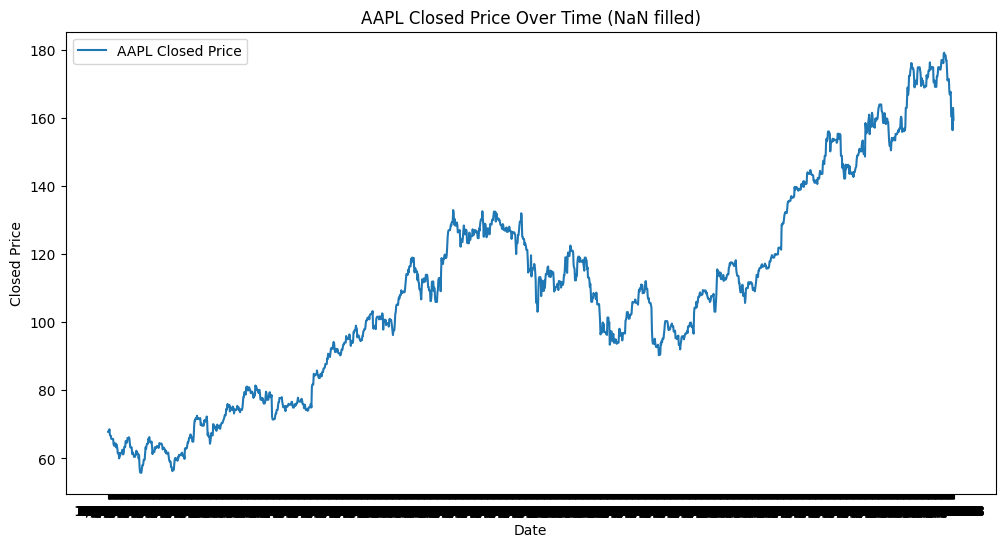

In [4]:
# Forward fill and backward fill missing values
data = data.ffill().bfill()

# Check if there are any remaining NaN values
print("Number of NaN values after filling:", data.isna().sum().sum())

# Plot the time series of a specific stock, for example, 'AAPL' after filling NaN values
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'], label='AAPL Closed Price')
plt.title('AAPL Closed Price Over Time (NaN filled)')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()

Missing values in each column:
Series([], dtype: int64)


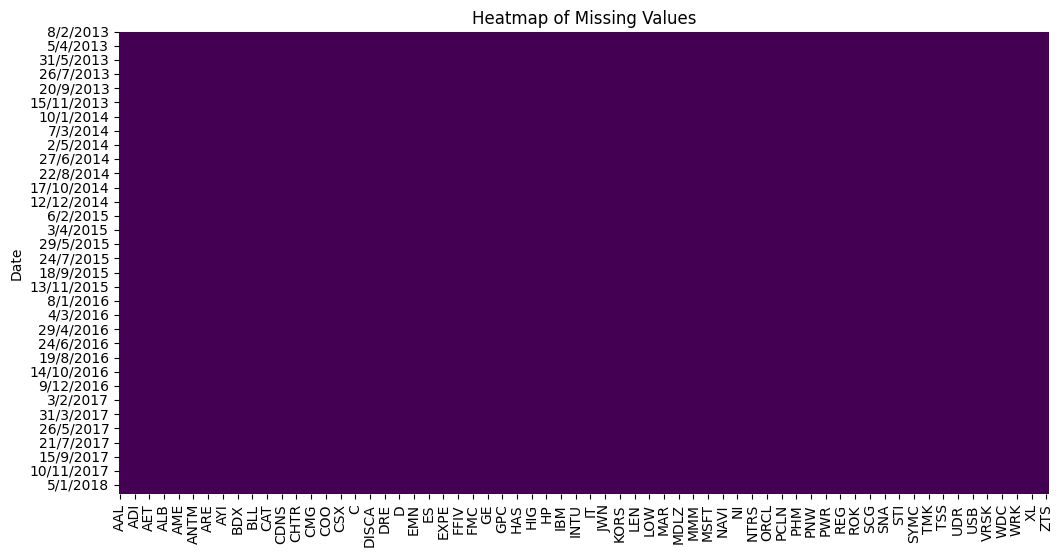

In [5]:
# EDA: Identifying Missing Values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

Naive Forecast

Naive Forecast MSE: 1.7124469372383555
Naive Forecast RMSE: 1.3086049584341164
Naive Forecast MAE: 0.7600657534246574


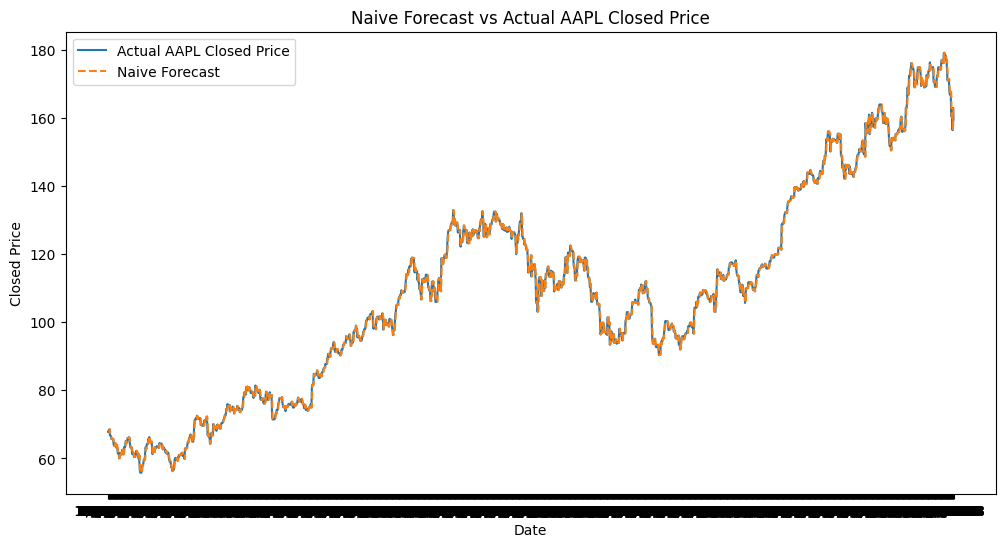

In [6]:
# Naive Forecast
naive_forecast = data['AAPL'].shift(1)

# Drop the first row to ensure they align correctly
naive_actual = data['AAPL'][1:]
naive_forecast = naive_forecast[1:]

# Evaluate the model's performance
naive_mse = mean_squared_error(naive_actual, naive_forecast)
naive_rmse = np.sqrt(naive_mse)
naive_mae = mean_absolute_error(naive_actual, naive_forecast)

print(f'Naive Forecast MSE: {naive_mse}')
print(f'Naive Forecast RMSE: {naive_rmse}')
print(f'Naive Forecast MAE: {naive_mae}')

# Plot the forecasts and compare them with the actual data
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'], label='Actual AAPL Closed Price')
plt.plot(naive_forecast, label='Naive Forecast', linestyle='--')
plt.title('Naive Forecast vs Actual AAPL Closed Price')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()


Stock Return of Naive Forecast

Naive Forecast Returns MSE: 0.0002920510062637346
Naive Forecast Returns RMSE: 0.017089499883370916
Naive Forecast Returns MAE: 0.011275083084442613


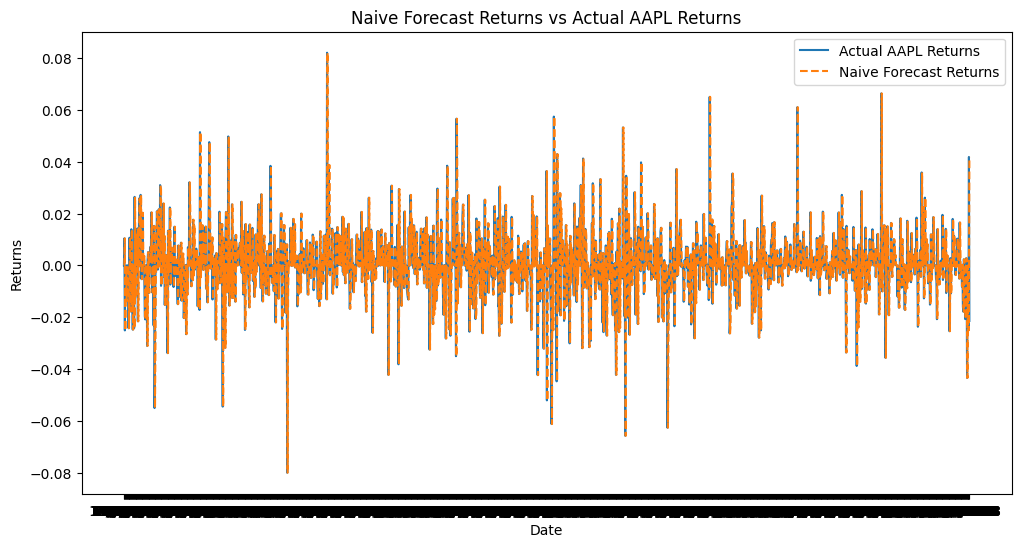

In [7]:
# Naive Forecast model
naive_forecast = data['AAPL'].shift(1)

# Drop the first row to ensure they align correctly
naive_actual = data['AAPL'][1:]
naive_forecast = naive_forecast[1:]

# Calculate daily returns for actual and forecasted prices
naive_actual_returns = naive_actual.pct_change().dropna()
naive_forecast_returns = naive_forecast.pct_change().dropna()

# Ensure alignment
naive_actual_returns, naive_forecast_returns = naive_actual_returns.align(naive_forecast_returns, join='inner')

# Evaluate the model's performance for returns
naive_mse_returns = mean_squared_error(naive_actual_returns, naive_forecast_returns)
naive_rmse_returns = np.sqrt(naive_mse_returns)
naive_mae_returns = mean_absolute_error(naive_actual_returns, naive_forecast_returns)

print(f'Naive Forecast Returns MSE: {naive_mse_returns}')
print(f'Naive Forecast Returns RMSE: {naive_rmse_returns}')
print(f'Naive Forecast Returns MAE: {naive_mae_returns}')

# Plot the returns and compare them with the actual returns
plt.figure(figsize=(12, 6))
plt.plot(naive_actual_returns, label='Actual AAPL Returns')
plt.plot(naive_forecast_returns, label='Naive Forecast Returns', linestyle='--')
plt.title('Naive Forecast Returns vs Actual AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


Simple Moving Average (SMA)

SMA Forecast MSE: 28.67464109902025
SMA Forecast RMSE: 5.354870782663224
SMA Forecast MAE: 4.181534581879572


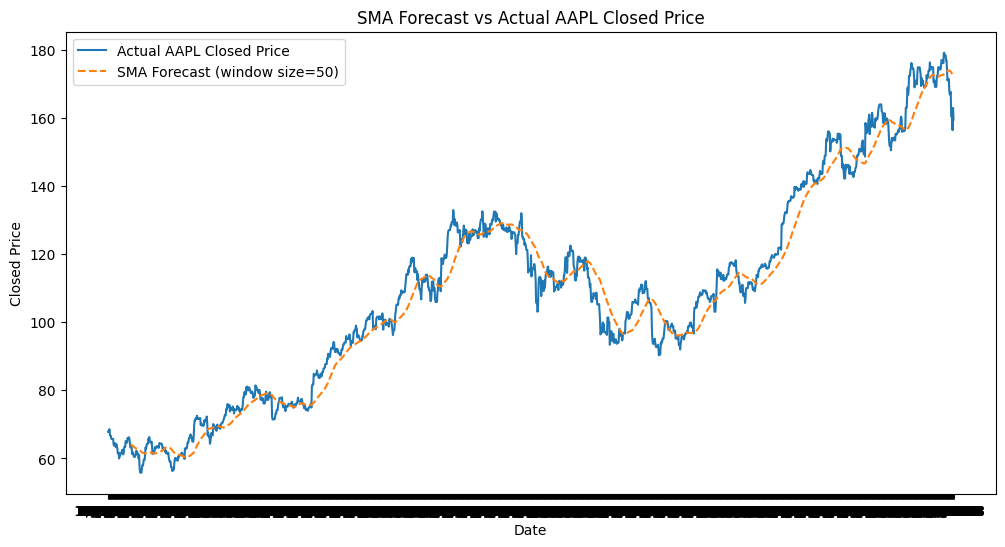

In [8]:
# Simple Moving Average (SMA)
window_size = 50  # You can adjust the window size as needed
sma_forecast = data['AAPL'].rolling(window=window_size).mean()

# Drop the initial rows to ensure they align correctly
sma_actual = data['AAPL'][window_size-1:]
sma_forecast = sma_forecast[window_size-1:]

# Evaluate the model's performance
sma_mse = mean_squared_error(sma_actual, sma_forecast)
sma_rmse = np.sqrt(sma_mse)
sma_mae = mean_absolute_error(sma_actual, sma_forecast)

print(f'SMA Forecast MSE: {sma_mse}')
print(f'SMA Forecast RMSE: {sma_rmse}')
print(f'SMA Forecast MAE: {sma_mae}')

# Plot the forecasts and compare them with the actual data
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'], label='Actual AAPL Closed Price')
plt.plot(sma_forecast, label=f'SMA Forecast (window size={window_size})', linestyle='--')
plt.title('SMA Forecast vs Actual AAPL Closed Price')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()


Stock Return of SMA

SMA Forecast Returns MSE: 0.00014367573630801254
SMA Forecast Returns RMSE: 0.011986481398142347
SMA Forecast Returns MAE: 0.0075220003367632805


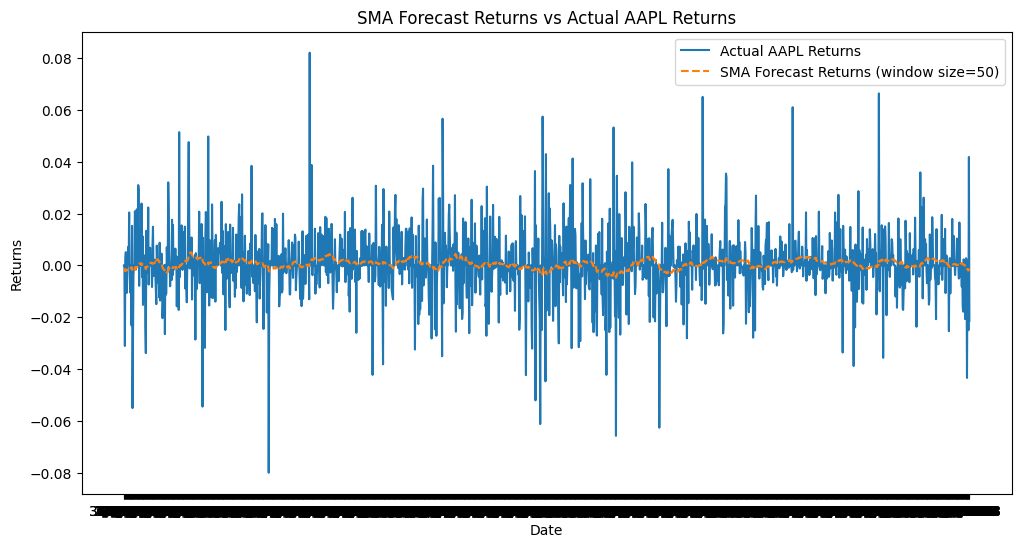

In [9]:
# Simple Moving Average (SMA)
window_size = 50  # You can adjust the window size as needed
sma_forecast = data['AAPL'].rolling(window=window_size).mean()

# Drop the initial rows to ensure they align correctly
sma_actual = data['AAPL'][window_size-1:]
sma_forecast = sma_forecast[window_size-1:]

# Calculate daily returns for actual and forecasted SMA prices
sma_actual_returns = sma_actual.pct_change().dropna()
sma_forecast_returns = sma_forecast.pct_change().dropna()

# Ensure alignment
sma_actual_returns, sma_forecast_returns = sma_actual_returns.align(sma_forecast_returns, join='inner')

# Evaluate the SMA model's performance for returns
sma_mse_returns = mean_squared_error(sma_actual_returns, sma_forecast_returns)
sma_rmse_returns = np.sqrt(sma_mse_returns)
sma_mae_returns = mean_absolute_error(sma_actual_returns, sma_forecast_returns)

print(f'SMA Forecast Returns MSE: {sma_mse_returns}')
print(f'SMA Forecast Returns RMSE: {sma_rmse_returns}')
print(f'SMA Forecast Returns MAE: {sma_mae_returns}')

# Plot the returns and compare them with the actual returns
plt.figure(figsize=(12, 6))
plt.plot(sma_actual_returns, label='Actual AAPL Returns')
plt.plot(sma_forecast_returns, label=f'SMA Forecast Returns (window size={window_size})', linestyle='--')
plt.title('SMA Forecast Returns vs Actual AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


Exponentially Weighted Moving Average (EWMA)

EWMA Forecast MSE: 5.699431489527029
EWMA Forecast RMSE: 2.3873482128770047
EWMA Forecast MAE: 1.8107372451509693


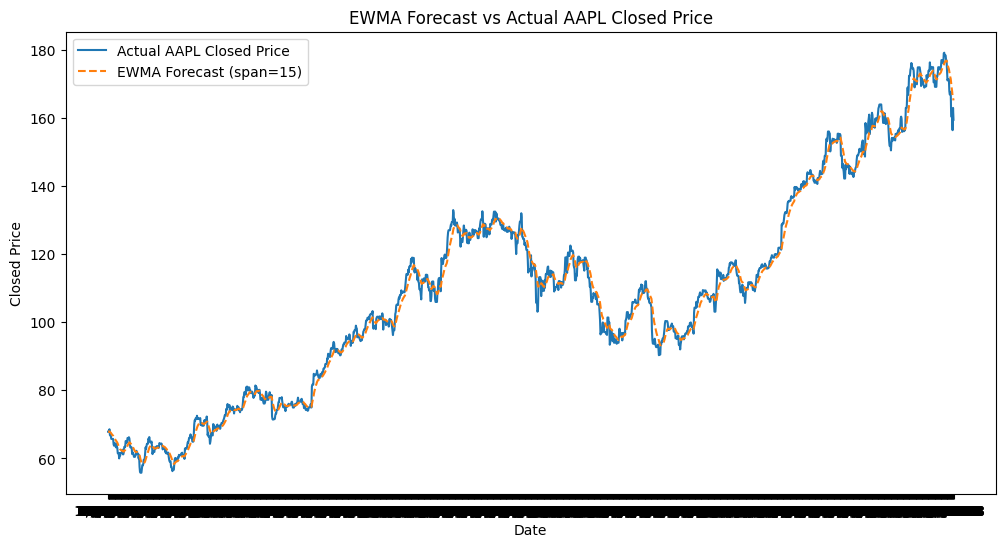

In [10]:
# Exponentially Weighted Moving Average (EWMA)
ewma_span = 15  # You can adjust the span as needed
ewma_forecast = data['AAPL'].ewm(span=ewma_span, adjust=False).mean()

# Ensure consistent lengths by aligning
ewma_actual, ewma_forecast = data['AAPL'].align(ewma_forecast, join='inner')

# Evaluate the model's performance
ewma_mse = mean_squared_error(ewma_actual, ewma_forecast)
ewma_rmse = np.sqrt(ewma_mse)
ewma_mae = mean_absolute_error(ewma_actual, ewma_forecast)

print(f'EWMA Forecast MSE: {ewma_mse}')
print(f'EWMA Forecast RMSE: {ewma_rmse}')
print(f'EWMA Forecast MAE: {ewma_mae}')

# Plot the forecasts and compare them with the actual data
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'], label='Actual AAPL Closed Price')
plt.plot(ewma_forecast, label=f'EWMA Forecast (span={ewma_span})', linestyle='--')
plt.title('EWMA Forecast vs Actual AAPL Closed Price')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()


Stock Return of EWMA

EWMA Forecast Returns MSE: 0.00011982360571662583
EWMA Forecast Returns RMSE: 0.01094639692851606
EWMA Forecast Returns MAE: 0.007108856781046456


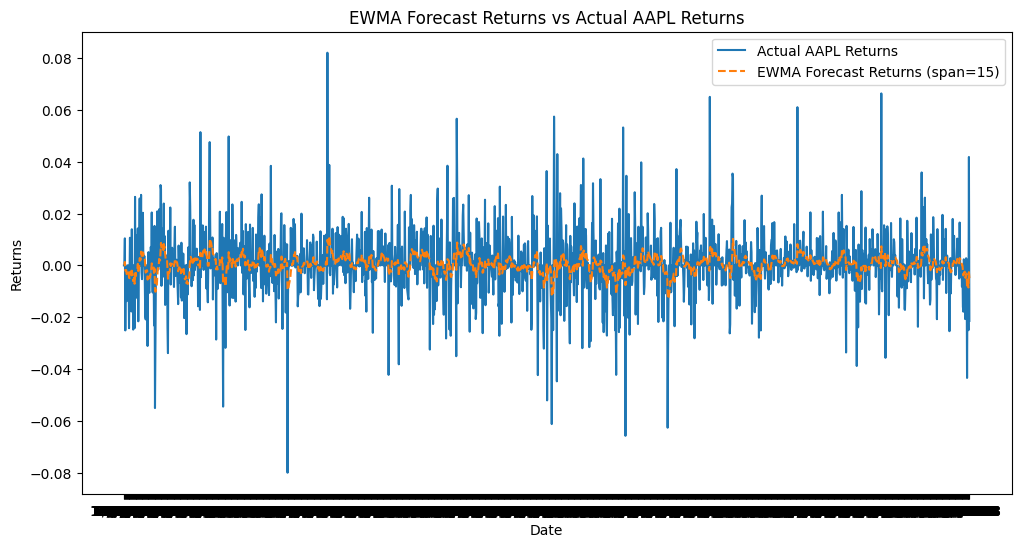

In [11]:
# Exponentially Weighted Moving Average (EWMA)
ewma_span = 15  # You can adjust the span as needed
ewma_forecast = data['AAPL'].ewm(span=ewma_span, adjust=False).mean()

# Ensure consistent lengths by aligning
ewma_actual, ewma_forecast = data['AAPL'].align(ewma_forecast, join='inner')

# Calculate daily returns for actual and forecasted EWMA prices
ewma_actual_returns = ewma_actual.pct_change().dropna()
ewma_forecast_returns = ewma_forecast.pct_change().dropna()

# Ensure alignment
ewma_actual_returns, ewma_forecast_returns = ewma_actual_returns.align(ewma_forecast_returns, join='inner')

# Evaluate the EWMA model's performance for returns
ewma_mse_returns = mean_squared_error(ewma_actual_returns, ewma_forecast_returns)
ewma_rmse_returns = np.sqrt(ewma_mse_returns)
ewma_mae_returns = mean_absolute_error(ewma_actual_returns, ewma_forecast_returns)

print(f'EWMA Forecast Returns MSE: {ewma_mse_returns}')
print(f'EWMA Forecast Returns RMSE: {ewma_rmse_returns}')
print(f'EWMA Forecast Returns MAE: {ewma_mae_returns}')

# Plot the returns and compare them with the actual returns
plt.figure(figsize=(12, 6))
plt.plot(ewma_actual_returns, label='Actual AAPL Returns')
plt.plot(ewma_forecast_returns, label=f'EWMA Forecast Returns (span={ewma_span})', linestyle='--')
plt.title('EWMA Forecast Returns vs Actual AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

Additive Holt-Winters Model

Holt-Winters Additive Model MSE: 1.3722970660247407
Holt-Winters Additive Model RMSE: 1.171450838074198
Holt-Winters Additive Model MAE: 0.8117865816640333


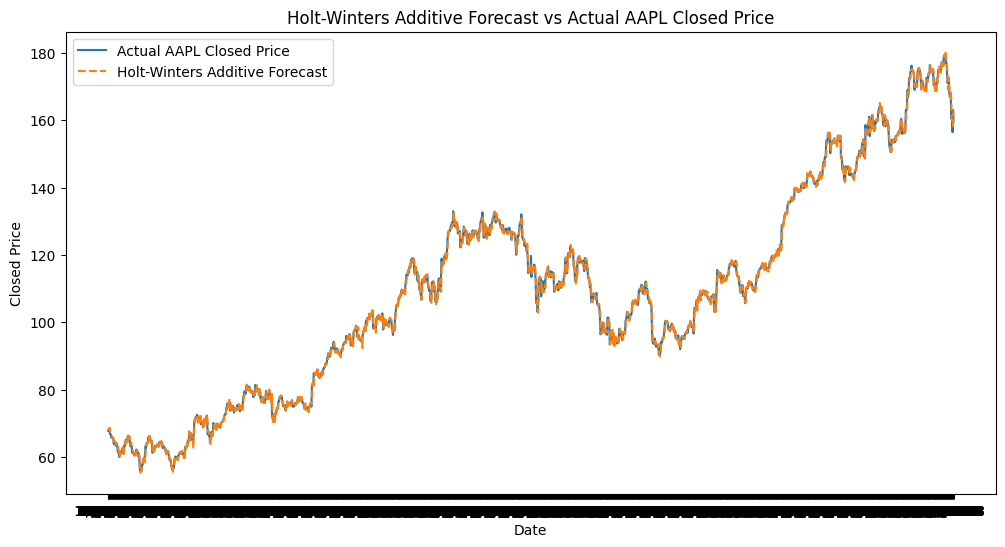

In [12]:
# Apply the Additive Holt-Winters model
hw_additive = ExponentialSmoothing(data['AAPL'], seasonal='add', seasonal_periods=365).fit()
hw_additive_forecast = hw_additive.fittedvalues

# Evaluate the model's performance
hw_additive_mse = mean_squared_error(data['AAPL'], hw_additive_forecast)
hw_additive_rmse = np.sqrt(hw_additive_mse)
hw_additive_mae = mean_absolute_error(data['AAPL'], hw_additive_forecast)

print(f'Holt-Winters Additive Model MSE: {hw_additive_mse}')
print(f'Holt-Winters Additive Model RMSE: {hw_additive_rmse}')
print(f'Holt-Winters Additive Model MAE: {hw_additive_mae}')

# Plot the forecasts and compare them with the actual data
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'], label='Actual AAPL Closed Price')
plt.plot(hw_additive_forecast, label='Holt-Winters Additive Forecast', linestyle='--')
plt.title('Holt-Winters Additive Forecast vs Actual AAPL Closed Price')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()


Stock Return of Additive Holt-Winters Model

Holt-Winters Additive Model Returns MSE: 0.00025460901340330834
Holt-Winters Additive Model Returns RMSE: 0.015956472461145926
Holt-Winters Additive Model Returns MAE: 0.011461632334486537


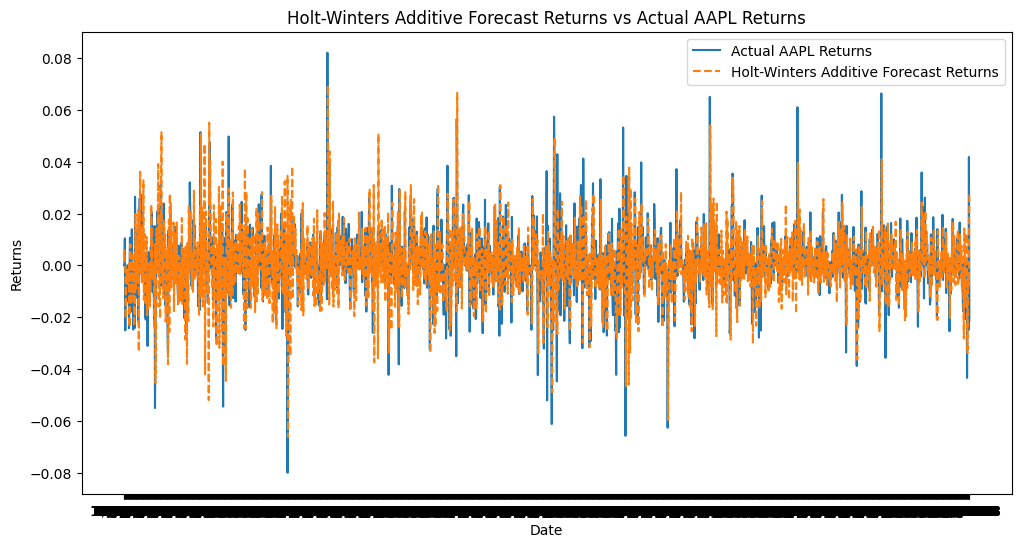

In [13]:
# Apply the Additive Holt-Winters model
hw_additive = ExponentialSmoothing(data['AAPL'], seasonal='add', seasonal_periods=365).fit()
hw_additive_forecast = hw_additive.fittedvalues

# Ensure consistent lengths by aligning
hw_additive_actual, hw_additive_forecast = data['AAPL'].align(hw_additive_forecast, join='inner')

# Calculate daily returns for actual and forecasted Holt-Winters prices
hw_additive_actual_returns = hw_additive_actual.pct_change().dropna()
hw_additive_forecast_returns = hw_additive_forecast.pct_change().dropna()

# Ensure alignment
hw_additive_actual_returns, hw_additive_forecast_returns = hw_additive_actual_returns.align(hw_additive_forecast_returns, join='inner')

# Evaluate the Holt-Winters model's performance for returns
hw_additive_mse_returns = mean_squared_error(hw_additive_actual_returns, hw_additive_forecast_returns)
hw_additive_rmse_returns = np.sqrt(hw_additive_mse_returns)
hw_additive_mae_returns = mean_absolute_error(hw_additive_actual_returns, hw_additive_forecast_returns)

print(f'Holt-Winters Additive Model Returns MSE: {hw_additive_mse_returns}')
print(f'Holt-Winters Additive Model Returns RMSE: {hw_additive_rmse_returns}')
print(f'Holt-Winters Additive Model Returns MAE: {hw_additive_mae_returns}')


# Plot the returns and compare them with the actual returns
plt.figure(figsize=(12, 6))
plt.plot(hw_additive_actual_returns, label='Actual AAPL Returns')
plt.plot(hw_additive_forecast_returns, label='Holt-Winters Additive Forecast Returns', linestyle='--')
plt.title('Holt-Winters Additive Forecast Returns vs Actual AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

Multiplicative Holt-Winters Model


Holt-Winters Multiplicative Model MSE: 1.318459147963739
Holt-Winters Multiplicative Model RMSE: 1.1482417637256273
Holt-Winters Multiplicative Model MAE: 0.805975288396114


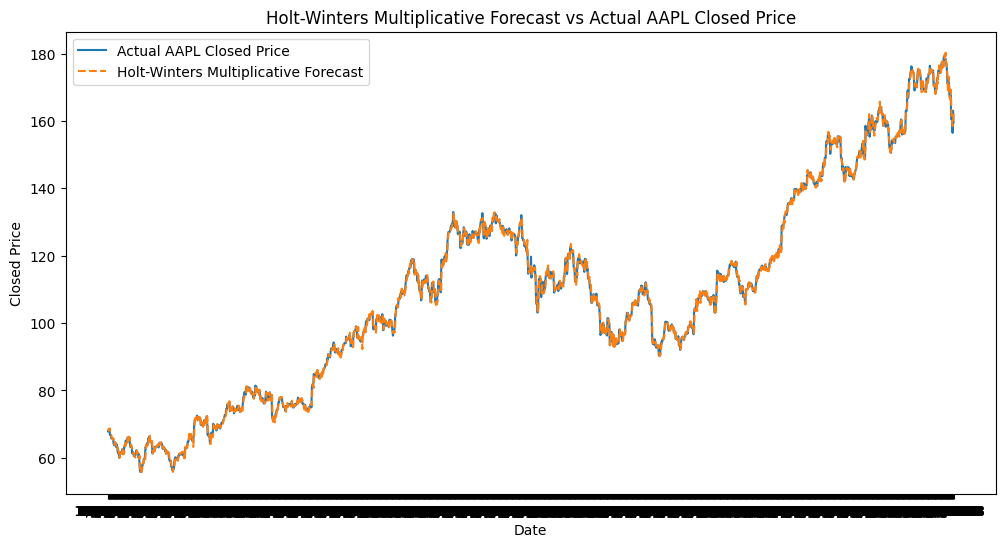

In [14]:
# Apply the Multiplicative Holt-Winters model
hw_multiplicative = ExponentialSmoothing(data['AAPL'], seasonal='mul', seasonal_periods=365).fit()
hw_multiplicative_forecast = hw_multiplicative.fittedvalues

# Evaluate the model's performance
hw_multiplicative_mse = mean_squared_error(data['AAPL'], hw_multiplicative_forecast)
hw_multiplicative_rmse = np.sqrt(hw_multiplicative_mse)
hw_multiplicative_mae = mean_absolute_error(data['AAPL'], hw_multiplicative_forecast)

print(f'Holt-Winters Multiplicative Model MSE: {hw_multiplicative_mse}')
print(f'Holt-Winters Multiplicative Model RMSE: {hw_multiplicative_rmse}')
print(f'Holt-Winters Multiplicative Model MAE: {hw_multiplicative_mae}')

# Plot the forecasts and compare them with the actual data
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'], label='Actual AAPL Closed Price')
plt.plot(hw_multiplicative_forecast, label='Holt-Winters Multiplicative Forecast', linestyle='--')
plt.title('Holt-Winters Multiplicative Forecast vs Actual AAPL Closed Price')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()


Stock Return of Multiplicative Holt-Winters Model

Holt-Winters Multiplicative Model Returns MSE: 0.00024859673452386135
Holt-Winters Multiplicative Model Returns RMSE: 0.015766950704681655
Holt-Winters Multiplicative Model Returns MAE: 0.011290630873643483


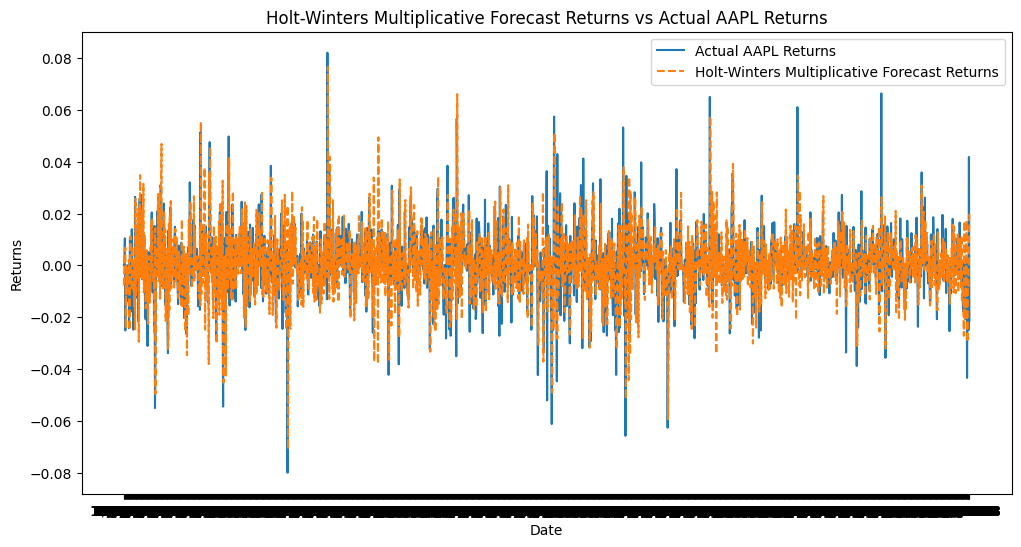

In [15]:
# Apply the Multiplicative Holt-Winters model
hw_multiplicative = ExponentialSmoothing(data['AAPL'], seasonal='mul', seasonal_periods=365).fit()
hw_multiplicative_forecast = hw_multiplicative.fittedvalues

# Ensure consistent lengths by aligning
hw_multiplicative_actual, hw_multiplicative_forecast = data['AAPL'].align(hw_multiplicative_forecast, join='inner')

# Calculate daily returns for actual and forecasted Holt-Winters prices
hw_multiplicative_actual_returns = hw_multiplicative_actual.pct_change().dropna()
hw_multiplicative_forecast_returns = hw_multiplicative_forecast.pct_change().dropna()

# Ensure alignment
hw_multiplicative_actual_returns, hw_multiplicative_forecast_returns = hw_multiplicative_actual_returns.align(hw_multiplicative_forecast_returns, join='inner')

# Evaluate the Holt-Winters model's performance for returns
hw_multiplicative_mse_returns = mean_squared_error(hw_multiplicative_actual_returns, hw_multiplicative_forecast_returns)
hw_multiplicative_rmse_returns = np.sqrt(hw_multiplicative_mse_returns)
hw_multiplicative_mae_returns = mean_absolute_error(hw_multiplicative_actual_returns, hw_multiplicative_forecast_returns)

print(f'Holt-Winters Multiplicative Model Returns MSE: {hw_multiplicative_mse_returns}')
print(f'Holt-Winters Multiplicative Model Returns RMSE: {hw_multiplicative_rmse_returns}')
print(f'Holt-Winters Multiplicative Model Returns MAE: {hw_multiplicative_mae_returns}')

# Plot the returns and compare them with the actual returns
plt.figure(figsize=(12, 6))
plt.plot(hw_multiplicative_actual_returns, label='Actual AAPL Returns')
plt.plot(hw_multiplicative_forecast_returns, label='Holt-Winters Multiplicative Forecast Returns', linestyle='--')
plt.title('Holt-Winters Multiplicative Forecast Returns vs Actual AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

ARIMA Model

1) Manual ARIMA

identify the order of differencing (d) using the ADF test.

In [16]:
# Perform ADF Test
def adf_test(series):
    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    return result[1]

# ADF Test on the original series
print("ADF Test for Original Series:")
p_value = adf_test(data['AAPL'])

# Differencing to make the series stationary
d = 0
while p_value > 0.05:
    d += 1
    data[f'AAPL_diff{d}'] = data['AAPL'].diff(d)
    print(f"\nADF Test for {d} Order Differenced Series:")
    p_value = adf_test(data[f'AAPL_diff{d}'])

print(f"Identified d value: {d}")


ADF Test for Original Series:
ADF Statistic: -0.6638780212108842
p-value: 0.8558854409146022
Critical Value (1%): -3.4339382310452033
Critical Value (5%): -2.863125003847544
Critical Value (10%): -2.56761380228936

ADF Test for 1 Order Differenced Series:
ADF Statistic: -19.065699568022076
p-value: 0.0
Critical Value (1%): -3.4339481027788024
Critical Value (5%): -2.8631293617920544
Critical Value (10%): -2.5676161227508754
Identified d value: 1


inspect the ACF and PACF plots to determine p and q.

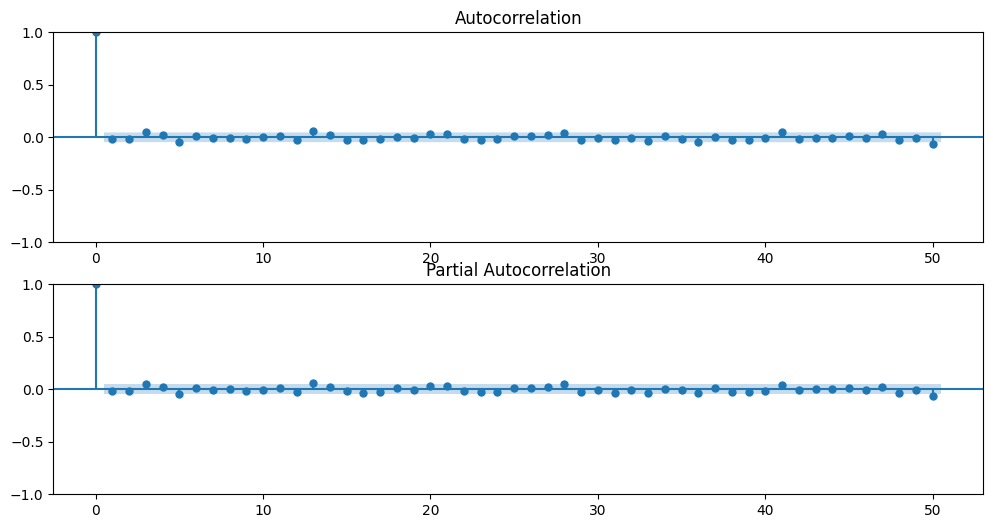

In [17]:
# ACF and PACF plots for the differenced series
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data[f'AAPL_diff{d}'].dropna(), ax=plt.gca(), lags=50)
plt.subplot(212)
plot_pacf(data[f'AAPL_diff{d}'].dropna(), ax=plt.gca(), lags=50)
plt.show()


In [18]:
# Based on the ACF and PACF plots, determine p and q manually
p = 0
q = 0

fit the ARIMA model with these parameters and evaluate its performance.

Manual ARIMA Model MSE: 1.7124469372383555
Manual ARIMA Model RMSE: 1.3086049584341164
Manual ARIMA Model MAE: 0.7600657534246574


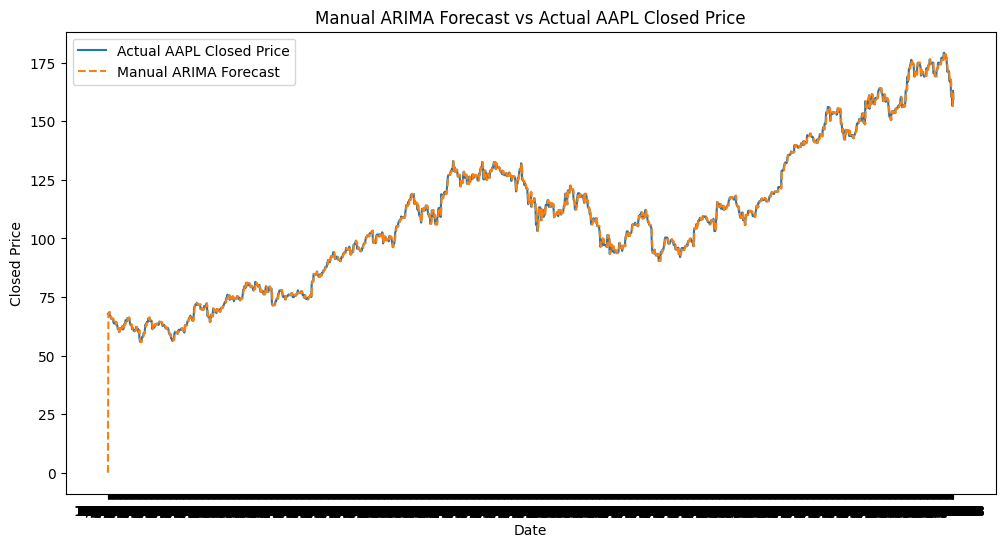

In [19]:
# Fit the ARIMA model manually
arima_model = ARIMA(data['AAPL'], order=(p, d, q)).fit()
arima_forecast = arima_model.fittedvalues

# Evaluate the model's performance
arima_mse = mean_squared_error(data['AAPL'][d:], arima_forecast[d:])
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(data['AAPL'][d:], arima_forecast[d:])

print(f'Manual ARIMA Model MSE: {arima_mse}')
print(f'Manual ARIMA Model RMSE: {arima_rmse}')
print(f'Manual ARIMA Model MAE: {arima_mae}')
# Plot the forecasts and compare them with the actual data
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'], label='Actual AAPL Closed Price')
plt.plot(arima_forecast, label='Manual ARIMA Forecast', linestyle='--')
plt.title('Manual ARIMA Forecast vs Actual AAPL Closed Price')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()

Stock Return of Manual Arima model

ADF Test for Original Series:
ADF Statistic: -0.6638780212108842
p-value: 0.8558854409146022
Critical Value (1%): -3.4339382310452033
Critical Value (5%): -2.863125003847544
Critical Value (10%): -2.56761380228936

ADF Test for 1 Order Differenced Series:
ADF Statistic: -19.065699568022076
p-value: 0.0
Critical Value (1%): -3.4339481027788024
Critical Value (5%): -2.8631293617920544
Critical Value (10%): -2.5676161227508754
Identified d value: 1


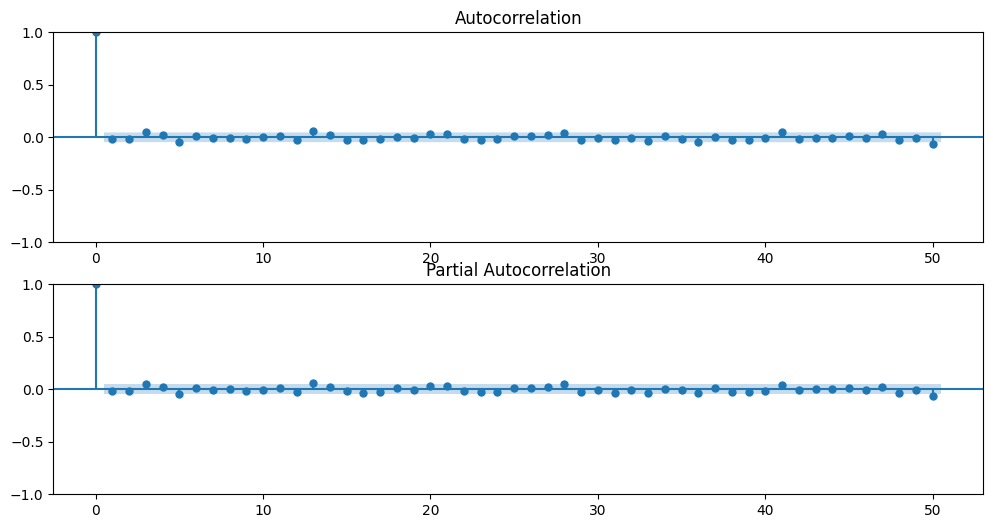

Manual ARIMA Model Returns MSE: 0.0002920510062637345
Manual ARIMA Model Returns RMSE: 0.017089499883370916
Manual ARIMA Model Returns MAE: 0.011275083084442614


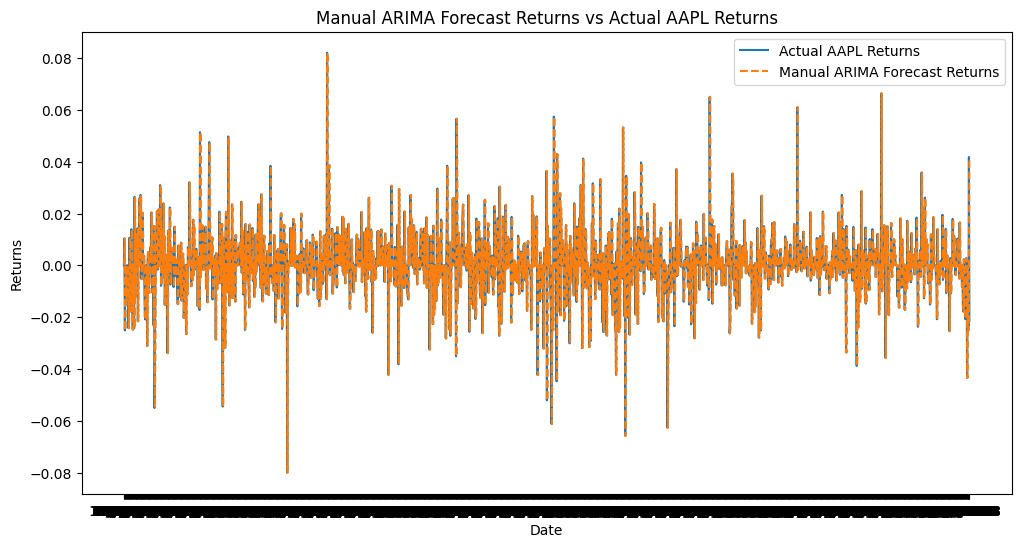

In [20]:
# Perform ADF Test
def adf_test(series):
    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    return result[1]

# ADF Test on the original series
print("ADF Test for Original Series:")
p_value = adf_test(data['AAPL'])

# Differencing to make the series stationary
d = 0
while p_value > 0.05:
    d += 1
    data[f'AAPL_diff{d}'] = data['AAPL'].diff(d)
    print(f"\nADF Test for {d} Order Differenced Series:")
    p_value = adf_test(data[f'AAPL_diff{d}'])

print(f"Identified d value: {d}")

# ACF and PACF plots for the differenced series
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data[f'AAPL_diff{d}'].dropna(), ax=plt.gca(), lags=50)
plt.subplot(212)
plot_pacf(data[f'AAPL_diff{d}'].dropna(), ax=plt.gca(), lags=50)
plt.show()

# Based on the ACF and PACF plots, determine p and q manually
p = 0
q = 0

# Fit the ARIMA model manually
arima_model = ARIMA(data['AAPL'], order=(p, d, q)).fit()
arima_forecast = arima_model.fittedvalues

# Ensure consistent lengths by aligning
arima_actual, arima_forecast = data['AAPL'].align(arima_forecast, join='inner')

# Calculate daily returns for actual and forecasted ARIMA prices
arima_actual_returns = arima_actual.pct_change().dropna()
arima_forecast_returns = arima_forecast.pct_change().dropna()

# Handle infinite or excessively large values
arima_actual_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
arima_forecast_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
arima_actual_returns.dropna(inplace=True)
arima_forecast_returns.dropna(inplace=True)

# Ensure alignment
arima_actual_returns, arima_forecast_returns = arima_actual_returns.align(arima_forecast_returns, join='inner')

# Evaluate the ARIMA model's performance for returns
arima_mse_returns = mean_squared_error(arima_actual_returns, arima_forecast_returns)
arima_rmse_returns = np.sqrt(arima_mse_returns)
arima_mae_returns = mean_absolute_error(arima_actual_returns, arima_forecast_returns)

print(f'Manual ARIMA Model Returns MSE: {arima_mse_returns}')
print(f'Manual ARIMA Model Returns RMSE: {arima_rmse_returns}')
print(f'Manual ARIMA Model Returns MAE: {arima_mae_returns}')

# Plot the returns and compare them with the actual returns
plt.figure(figsize=(12, 6))
plt.plot(arima_actual_returns, label='Actual AAPL Returns')
plt.plot(arima_forecast_returns, label='Manual ARIMA Forecast Returns', linestyle='--')
plt.title('Manual ARIMA Forecast Returns vs Actual AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

2. Auto ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6159.823, Time=2.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6162.144, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6163.850, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6163.842, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6162.836, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6166.894, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6166.728, Time=0.75 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6161.584, Time=3.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6161.587, Time=3.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6165.807, Time=0.90 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6164.986, Time=0.77 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6164.732, Time=0.45 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6163.255, Time=1.69 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6160.631, Time=1.56 sec

Best model:  ARIMA(2,1,2)(0,0,0)

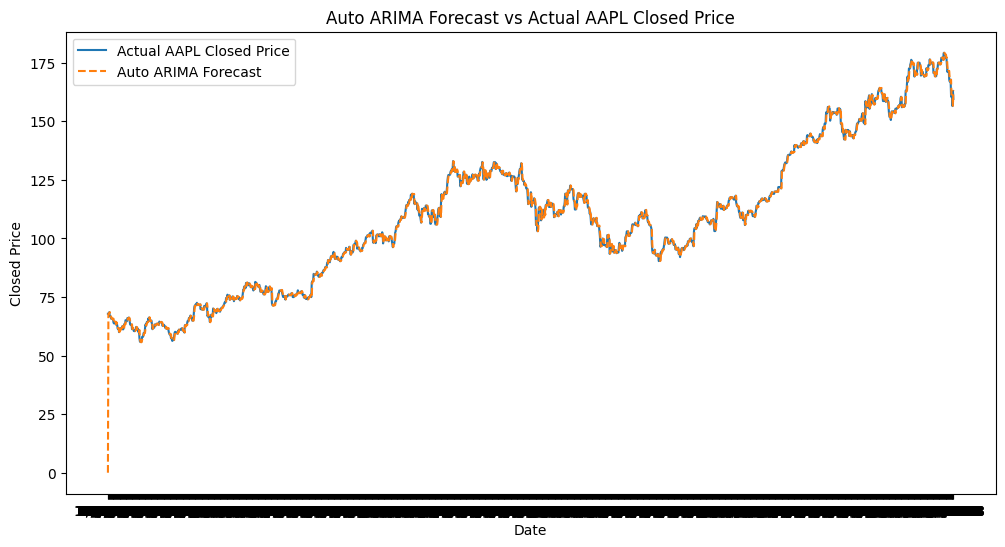

In [21]:
# Use auto_arima to find the best p, d, q
model = auto_arima(data['AAPL'], seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
p = model.order[0]
d = model.order[1]
q = model.order[2]

print(f"Identified (p, d, q) values: ({p}, {d}, {q})")

# Fit the ARIMA model using auto_arima parameters
arima_model = ARIMA(data['AAPL'], order=(p, d, q)).fit()
arima_forecast = arima_model.fittedvalues

# Evaluate the model's performance
arima_mse = mean_squared_error(data['AAPL'][d:], arima_forecast[d:])
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(data['AAPL'][d:], arima_forecast[d:])

print(f'Auto ARIMA Model MSE: {arima_mse}')
print(f'Auto ARIMA Model RMSE: {arima_rmse}')
print(f'Auto ARIMA Model MAE: {arima_mae}')


# Plot the forecasts and compare them with the actual data
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'], label='Actual AAPL Closed Price')
plt.plot(arima_forecast, label='Auto ARIMA Forecast', linestyle='--')
plt.title('Auto ARIMA Forecast vs Actual AAPL Closed Price')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()

Stock Return of Auto Arima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6159.823, Time=2.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6162.144, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6163.850, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6163.842, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6162.836, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6166.894, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6166.728, Time=0.78 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6161.584, Time=3.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6161.587, Time=3.63 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6165.807, Time=1.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6164.986, Time=0.88 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6164.732, Time=1.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6163.255, Time=3.93 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6160.631, Time=1.13 sec

Best model:  ARIMA(2,1,2)(0,0,0)

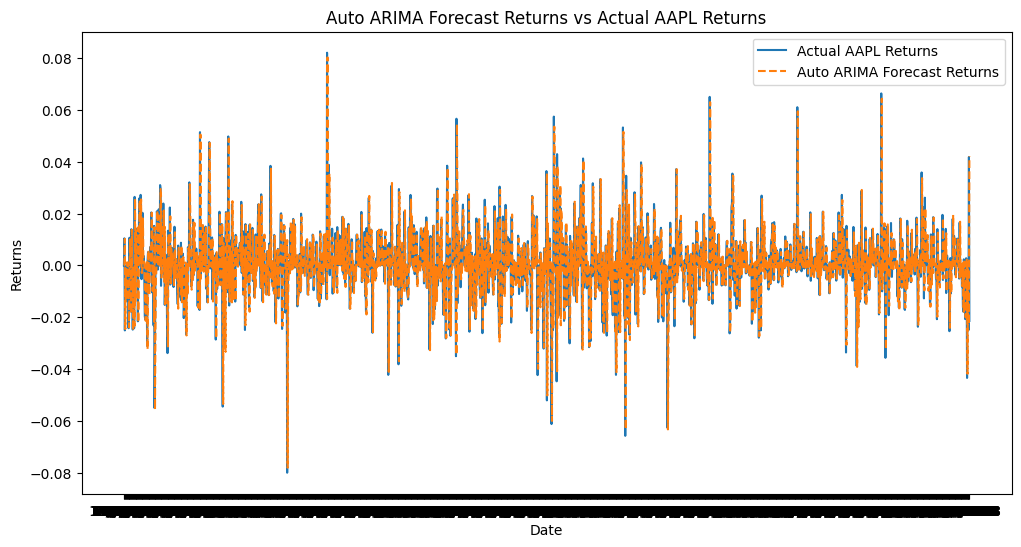

In [22]:
# Use auto_arima to find the best p, d, q
model = auto_arima(data['AAPL'], seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
p = model.order[0]
d = model.order[1]
q = model.order[2]

print(f"Identified (p, d, q) values: ({p}, {d}, {q})")

# Fit the ARIMA model using auto_arima parameters
arima_model = ARIMA(data['AAPL'], order=(p, d, q)).fit()
arima_forecast = arima_model.fittedvalues

# Ensure consistent lengths by aligning
arima_actual, arima_forecast = data['AAPL'].align(arima_forecast, join='inner')

# Calculate daily returns for actual and forecasted ARIMA prices
arima_actual_returns = arima_actual.pct_change().dropna()
arima_forecast_returns = arima_forecast.pct_change().dropna()

# Handle infinite or excessively large values
arima_actual_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
arima_forecast_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
arima_actual_returns.dropna(inplace=True)
arima_forecast_returns.dropna(inplace=True)

# Ensure alignment
arima_actual_returns, arima_forecast_returns = arima_actual_returns.align(arima_forecast_returns, join='inner')

# Evaluate the ARIMA model's performance for returns
arima_mse_returns = mean_squared_error(arima_actual_returns, arima_forecast_returns)
arima_rmse_returns = np.sqrt(arima_mse_returns)
arima_mae_returns = mean_absolute_error(arima_actual_returns, arima_forecast_returns)

print(f'Auto ARIMA Model Returns MSE: {arima_mse_returns}')
print(f'Auto ARIMA Model Returns RMSE: {arima_rmse_returns}')
print(f'Auto ARIMA Model Returns MAE: {arima_mae_returns}')

# Plot the returns and compare them with the actual returns
plt.figure(figsize=(12, 6))
plt.plot(arima_actual_returns, label='Actual AAPL Returns')
plt.plot(arima_forecast_returns, label='Auto ARIMA Forecast Returns', linestyle='--')
plt.title('Auto ARIMA Forecast Returns vs Actual AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

ARIMAX Model

Step 1: Load the Dataset with Exogenous Variables

In [23]:
# Load the S&P 500 dataset
sp500_data = pd.read_csv(r'C:/P@i/Time Series Forecasting Assignment/sp500_close.csv', parse_dates=['Date'], index_col='Date')

# Load the economic indicators dataset
exog_data = pd.read_csv(r'C:/P@i/Time Series Forecasting Assignment/economic_indicators.csv', parse_dates=['Date'], index_col='Date')

# Merge the datasets on the Date column
data = sp500_data.join(exog_data, how='inner')

# Forward fill and backward fill missing values
data = data.ffill().bfill()

# Check the combined dataset
print(data.head())

             AAL     AAPL    AAP   ABBV    ABC    ABT    ACN   ADBE    ADI  \
Date                                                                         
8/2/2013   14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
9/2/2013   14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
10/2/2013  14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
11/2/2013  14.46  68.5614  78.39  35.85  46.76  34.26  73.07  38.64  46.08   
12/2/2013  14.27  66.8428  78.60  35.42  46.96  34.30  73.37  38.89  46.27   

             ADM  ...    XOM   XRAY    XRX    XYL    YUM    ZBH   ZION    ZTS  \
Date              ...                                                           
8/2/2013   30.22  ...  88.61  42.87  31.84  27.09  65.30  75.85  24.14  33.05   
9/2/2013   30.22  ...  88.61  42.87  31.84  27.09  65.30  75.85  24.14  33.05   
10/2/2013  30.22  ...  88.61  42.87  31.84  27.09  65.30  75.85  24.14  33.05   
11/2/2013  30.28  ...  88.28  42.84  31.96  27.4

Step 2: Identify Potential Exogenous Variables

In [24]:
# List the columns to understand the potential exogenous variables
print(data.columns)


Index(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM',
       ...
       'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS', 'NASDAQ',
       'Inflation_Rate'],
      dtype='object', length=507)


Step 3: Fit the ARIMAX Model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6159.823, Time=3.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6162.144, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6163.850, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6163.842, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6162.836, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6166.894, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6166.728, Time=0.85 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6161.584, Time=3.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6161.587, Time=3.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6165.807, Time=0.97 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6164.986, Time=1.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6164.732, Time=0.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6163.255, Time=3.60 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6160.631, Time=1.80 sec

Best model:  ARIMA(2,1,2)(0,0,0)

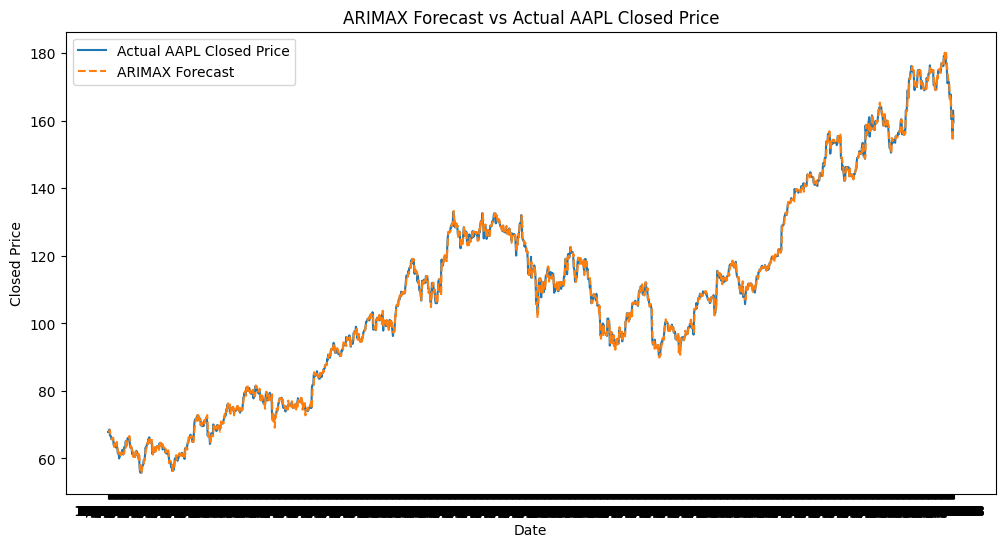

In [25]:
# Use auto_arima to find the best p, d, q values incorporating exogenous variables
exog_vars = data[['NASDAQ', 'Inflation_Rate']]
model = auto_arima(data['AAPL'], exogenous=exog_vars, seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
p = model.order[0]
d = model.order[1]
q = model.order[2]

print(f"Identified (p, d, q) values: ({p}, {d}, {q})")

# Fit the ARIMAX model
arimax_model = ARIMA(data['AAPL'], exog=exog_vars, order=(p, d, q)).fit()
arimax_forecast = arimax_model.predict(start=data.index[d], end=data.index[-1], exog=exog_vars[d:])

# Evaluate the model's performance
arimax_mse = mean_squared_error(data['AAPL'][d:], arimax_forecast)
arimax_rmse = np.sqrt(arimax_mse)
arimax_mae = mean_absolute_error(data['AAPL'][d:], arimax_forecast)

print(f'ARIMAX Model MSE: {arimax_mse}')
print(f'ARIMAX Model RMSE: {arimax_rmse}')
print(f'ARIMAX Model MAE: {arimax_mae}')

# Plot the forecasts and compare them with the actual data
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'], label='Actual AAPL Closed Price')
plt.plot(arimax_forecast, label='ARIMAX Forecast', linestyle='--')
plt.title('ARIMAX Forecast vs Actual AAPL Closed Price')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()


Stock Return of ARIMAX

             AAL     AAPL    AAP   ABBV    ABC    ABT    ACN   ADBE    ADI  \
Date                                                                         
8/2/2013   14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
9/2/2013   14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
10/2/2013  14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
11/2/2013  14.46  68.5614  78.39  35.85  46.76  34.26  73.07  38.64  46.08   
12/2/2013  14.27  66.8428  78.60  35.42  46.96  34.30  73.37  38.89  46.27   

             ADM  ...    XOM   XRAY    XRX    XYL    YUM    ZBH   ZION    ZTS  \
Date              ...                                                           
8/2/2013   30.22  ...  88.61  42.87  31.84  27.09  65.30  75.85  24.14  33.05   
9/2/2013   30.22  ...  88.61  42.87  31.84  27.09  65.30  75.85  24.14  33.05   
10/2/2013  30.22  ...  88.61  42.87  31.84  27.09  65.30  75.85  24.14  33.05   
11/2/2013  30.28  ...  88.28  42.84  31.96  27.4

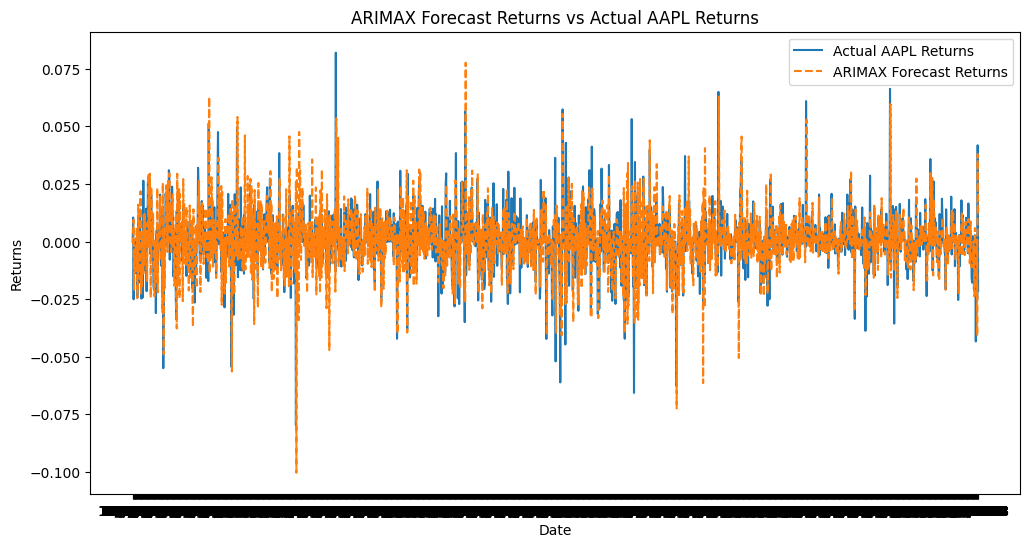

In [26]:
# Load the S&P 500 dataset
sp500_data = pd.read_csv(r'C:/P@i/Time Series Forecasting Assignment/sp500_close.csv', parse_dates=['Date'], index_col='Date')

# Load the economic indicators dataset
exog_data = pd.read_csv(r'C:/P@i/Time Series Forecasting Assignment/economic_indicators.csv', parse_dates=['Date'], index_col='Date')

# Merge the datasets on the Date column
data = sp500_data.join(exog_data, how='inner')

# Forward fill and backward fill missing values
data = data.ffill().bfill()

# Check the combined dataset
print(data.head())

# List the columns to understand the potential exogenous variables
print(data.columns)

# Define the exogenous variables
exog_vars = data[['NASDAQ', 'Inflation_Rate']]

# Use auto_arima to find the best p, d, q values incorporating exogenous variables
model = auto_arima(data['AAPL'], exogenous=exog_vars, seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
p = model.order[0]
d = model.order[1]
q = model.order[2]

print(f"Identified (p, d, q) values: ({p}, {d}, {q})")

# Fit the ARIMAX model
arimax_model = ARIMA(data['AAPL'], exog=exog_vars, order=(p, d, q)).fit()
arimax_forecast = arimax_model.predict(start=data.index[d], end=data.index[-1], exog=exog_vars[d:])

# Ensure consistent lengths by aligning
arimax_actual, arimax_forecast = data['AAPL'].align(arimax_forecast, join='inner')

# Calculate daily returns for actual and forecasted ARIMAX prices
arimax_actual_returns = arimax_actual.pct_change().dropna()
arimax_forecast_returns = arimax_forecast.pct_change().dropna()

# Handle infinite or excessively large values
arimax_actual_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
arimax_forecast_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
arimax_actual_returns.dropna(inplace=True)
arimax_forecast_returns.dropna(inplace=True)

# Ensure alignment
arimax_actual_returns, arimax_forecast_returns = arimax_actual_returns.align(arimax_forecast_returns, join='inner')

# Evaluate the ARIMAX model's performance for returns
arimax_mse_returns = mean_squared_error(arimax_actual_returns, arimax_forecast_returns)
arimax_rmse_returns = np.sqrt(arimax_mse_returns)
arimax_mae_returns = mean_absolute_error(arimax_actual_returns, arimax_forecast_returns)

print(f'ARIMAX Model Returns MSE: {arimax_mse_returns}')
print(f'ARIMAX Model Returns RMSE: {arimax_rmse_returns}')
print(f'ARIMAX Model Returns MAE: {arimax_mae_returns}')

# Plot the returns and compare them with the actual returns
plt.figure(figsize=(12, 6))
plt.plot(arimax_actual_returns, label='Actual AAPL Returns')
plt.plot(arimax_forecast_returns, label='ARIMAX Forecast Returns', linestyle='--')
plt.title('ARIMAX Forecast Returns vs Actual AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

SARIMA Model

Step 1: Identify the Seasonal Pattern

Assume we identify For quarterly data, S = 4 time periods per year.

Step 2: ACF and PACF Plots

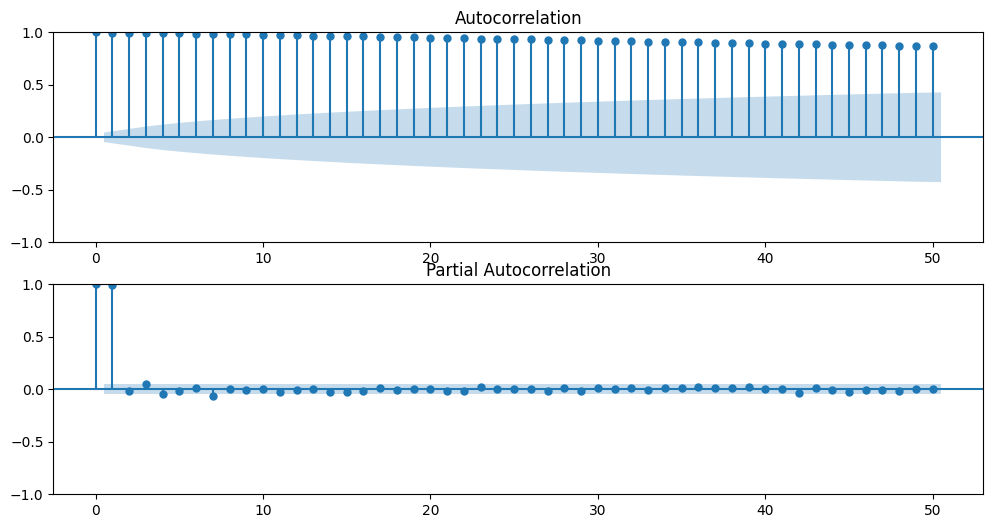

In [27]:
# Plot ACF and PACF to determine seasonal orders
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data['AAPL'], ax=plt.gca(), lags=50)
plt.subplot(212)
plot_pacf(data['AAPL'], ax=plt.gca(), lags=50)
plt.show()

Step 3: Fit the SARIMA Model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=6162.670, Time=3.83 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=6162.144, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=6164.787, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=6164.765, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=6162.836, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=6163.086, Time=0.19 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=6163.074, Time=0.12 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=6165.057, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=6163.850, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=6163.842, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=6165.807, Time=0.74 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4] intercept
Total fit time: 6.338 seconds
Identified SARIMA parameters: (0, 1, 0) and seasonal order: (0, 0, 0, 4)
SARIMA Model MSE: 1.7124469372383555
SARIMA Model RMSE: 1.3086049584341164
SARIMA

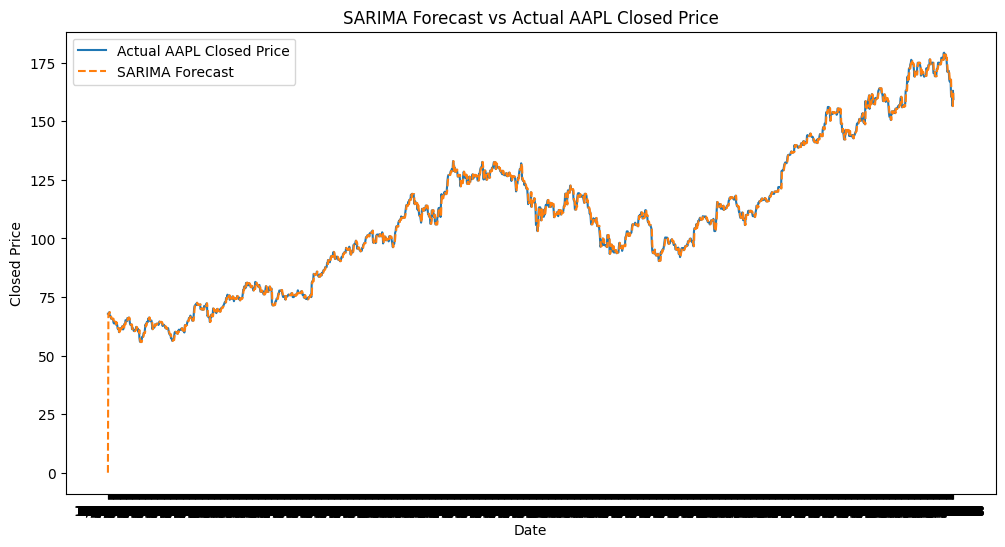

In [28]:
# Use auto_arima to find the best SARIMA parameters for quarterly data
sarima_model = auto_arima(data['AAPL'], seasonal=True, m=4, trace=True, stepwise=True, suppress_warnings=True)

# Print the identified parameters
print(f"Identified SARIMA parameters: {sarima_model.order} and seasonal order: {sarima_model.seasonal_order}")

# Extract the best SARIMA parameters
order = sarima_model.order
seasonal_order = sarima_model.seasonal_order

# Fit the SARIMA model
sarima_fitted = SARIMAX(data['AAPL'], order=order, seasonal_order=seasonal_order).fit()

# Forecast the values
sarima_forecast = sarima_fitted.fittedvalues

# Evaluate the model's performance
sarima_mse = mean_squared_error(data['AAPL'][1:], sarima_forecast[1:])
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(data['AAPL'][1:], sarima_forecast[1:])

print(f'SARIMA Model MSE: {sarima_mse}')
print(f'SARIMA Model RMSE: {sarima_rmse}')
print(f'SARIMA Model MAE: {sarima_mae}')

# Plot the forecasts and compare them with the actual data
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'], label='Actual AAPL Closed Price')
plt.plot(sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.title('SARIMA Forecast vs Actual AAPL Closed Price')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()

Stock Return of SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=6162.670, Time=4.13 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=6162.144, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=6164.787, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=6164.765, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=6162.836, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=6163.086, Time=0.20 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=6163.074, Time=0.17 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=6165.057, Time=0.87 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=6163.850, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=6163.842, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=6165.807, Time=1.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4] intercept
Total fit time: 7.199 seconds
Identified SARIMA parameters: (0, 1, 0) and seasonal order: (0, 0, 0, 4)
SARIMA Model Returns MSE: 0.0002920510062637345
SARIMA Model Returns RMSE: 0.0170

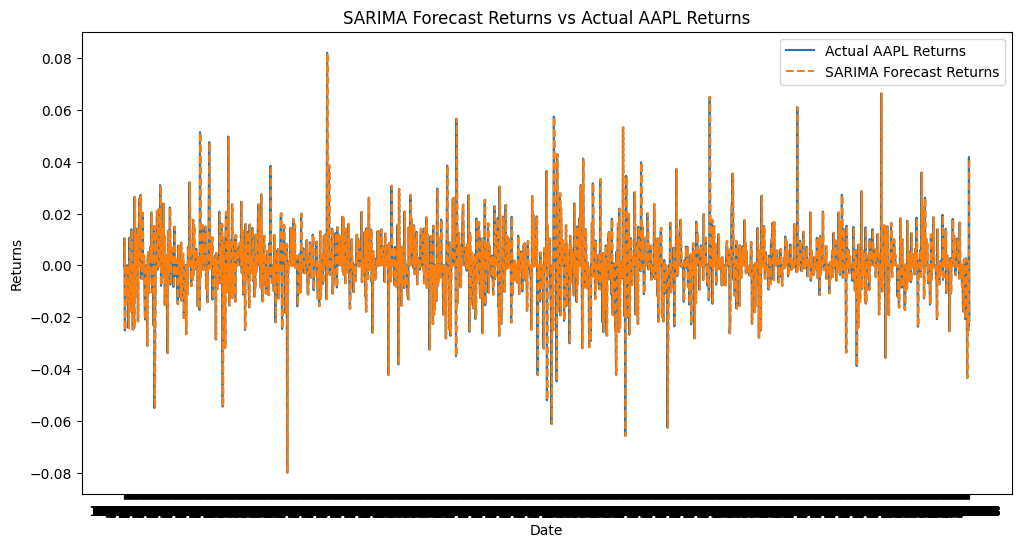

In [29]:

# Use auto_arima to find the best SARIMA parameters for quarterly data
sarima_model = auto_arima(data['AAPL'], seasonal=True, m=4, trace=True, stepwise=True, suppress_warnings=True)

# Print the identified parameters
print(f"Identified SARIMA parameters: {sarima_model.order} and seasonal order: {sarima_model.seasonal_order}")

# Extract the best SARIMA parameters
order = sarima_model.order
seasonal_order = sarima_model.seasonal_order

# Fit the SARIMA model
sarima_fitted = SARIMAX(data['AAPL'], order=order, seasonal_order=seasonal_order).fit()

# Forecast the values
sarima_forecast = sarima_fitted.fittedvalues

# Ensure consistent lengths by aligning
sarima_actual, sarima_forecast = data['AAPL'].align(sarima_forecast, join='inner')

# Calculate daily returns for actual and forecasted SARIMA prices
sarima_actual_returns = sarima_actual.pct_change().dropna()
sarima_forecast_returns = sarima_forecast.pct_change().dropna()

# Handle infinite or excessively large values
sarima_actual_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
sarima_forecast_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
sarima_actual_returns.dropna(inplace=True)
sarima_forecast_returns.dropna(inplace=True)

# Ensure alignment
sarima_actual_returns, sarima_forecast_returns = sarima_actual_returns.align(sarima_forecast_returns, join='inner')

# Evaluate the SARIMA model's performance for returns
sarima_mse_returns = mean_squared_error(sarima_actual_returns, sarima_forecast_returns)
sarima_rmse_returns = np.sqrt(sarima_mse_returns)
sarima_mae_returns = mean_absolute_error(sarima_actual_returns, sarima_forecast_returns)

print(f'SARIMA Model Returns MSE: {sarima_mse_returns}')
print(f'SARIMA Model Returns RMSE: {sarima_rmse_returns}')
print(f'SARIMA Model Returns MAE: {sarima_mae_returns}')

# Plot the returns and compare them with the actual returns
plt.figure(figsize=(12, 6))
plt.plot(sarima_actual_returns, label='Actual AAPL Returns')
plt.plot(sarima_forecast_returns, label='SARIMA Forecast Returns', linestyle='--')
plt.title('SARIMA Forecast Returns vs Actual AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

SARIMAX Model

Step 1: Load Data Including Exogenous Variables

In [30]:
# Load the S&P 500 dataset
data = pd.read_csv(r'C:/P@i/Time Series Forecasting Assignment/sp500_close.csv', parse_dates=['Date'], index_col='Date')

# Load the economic indicators dataset
economic_indicators = pd.read_csv(r'C:/P@i/Time Series Forecasting Assignment/economic_indicators.csv', parse_dates=['Date'], index_col='Date')

# Forward fill and backward fill missing values
data = data.ffill().bfill()
economic_indicators = economic_indicators.ffill().bfill()

# Align the date ranges
economic_indicators = economic_indicators.reindex(data.index, method='ffill').bfill()

# Merge datasets
data = data.join(economic_indicators, how='inner')

# Check the combined dataset
print(data.head())

             AAL     AAPL    AAP   ABBV    ABC    ABT    ACN   ADBE    ADI  \
Date                                                                         
8/2/2013   14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
9/2/2013   14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
10/2/2013  14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
11/2/2013  14.46  68.5614  78.39  35.85  46.76  34.26  73.07  38.64  46.08   
12/2/2013  14.27  66.8428  78.60  35.42  46.96  34.30  73.37  38.89  46.27   

             ADM  ...    XOM   XRAY    XRX    XYL    YUM    ZBH   ZION    ZTS  \
Date              ...                                                           
8/2/2013   30.22  ...  88.61  42.87  31.84  27.09  65.30  75.85  24.14  33.05   
9/2/2013   30.22  ...  88.61  42.87  31.84  27.09  65.30  75.85  24.14  33.05   
10/2/2013  30.22  ...  88.61  42.87  31.84  27.09  65.30  75.85  24.14  33.05   
11/2/2013  30.28  ...  88.28  42.84  31.96  27.4

Step 2: Fit the SARIMAX Model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=6162.670, Time=3.28 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=6162.144, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=6164.787, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=6164.765, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=6162.836, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=6163.086, Time=0.18 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=6163.074, Time=0.14 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=6165.057, Time=1.10 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=6163.850, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=6163.842, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=6165.807, Time=1.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4] intercept
Total fit time: 7.032 seconds
Identified SARIMAX parameters: (0, 1, 0) and seasonal order: (0, 0, 0, 4)
SARIMAX Model MSE: 1.006613008377834
SARIMAX Model RMSE: 1.0033010557045348
SARI

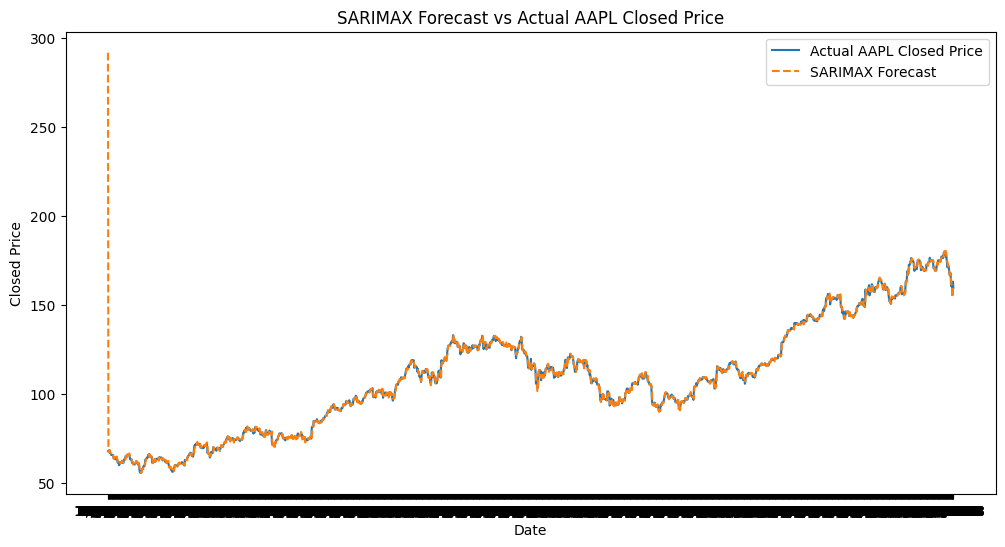

In [31]:
# Define the exogenous variables
exog_vars = data[['NASDAQ', 'Inflation_Rate']]

# Use auto_arima to find the best SARIMAX parameters for quarterly data
sarimax_model = auto_arima(data['AAPL'], exogenous=exog_vars, seasonal=True, m=4, trace=True, stepwise=True, suppress_warnings=True)

# Print the identified parameters
print(f"Identified SARIMAX parameters: {sarimax_model.order} and seasonal order: {sarimax_model.seasonal_order}")

# Extract the best SARIMAX parameters
order = sarimax_model.order
seasonal_order = sarimax_model.seasonal_order

# Fit the SARIMAX model
sarimax_fitted = SARIMAX(data['AAPL'], exog=exog_vars, order=order, seasonal_order=seasonal_order).fit()

# Forecast the values
sarimax_forecast = sarimax_fitted.fittedvalues

# Evaluate the model's performance
sarimax_mse = mean_squared_error(data['AAPL'][1:], sarimax_forecast[1:])
sarimax_rmse = np.sqrt(sarimax_mse)
sarimax_mae = mean_absolute_error(data['AAPL'][1:], sarimax_forecast[1:])

print(f'SARIMAX Model MSE: {sarimax_mse}')
print(f'SARIMAX Model RMSE: {sarimax_rmse}')
print(f'SARIMAX Model MAE: {sarimax_mae}')
# Plot the forecasts and compare them with the actual data
plt.figure(figsize=(12, 6))
plt.plot(data['AAPL'], label='Actual AAPL Closed Price')
plt.plot(sarimax_forecast, label='SARIMAX Forecast', linestyle='--')
plt.title('SARIMAX Forecast vs Actual AAPL Closed Price')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()



Stock Return of SARIMAX Model

             AAL     AAPL    AAP   ABBV    ABC    ABT    ACN   ADBE    ADI  \
Date                                                                         
8/2/2013   14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
9/2/2013   14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
10/2/2013  14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
11/2/2013  14.46  68.5614  78.39  35.85  46.76  34.26  73.07  38.64  46.08   
12/2/2013  14.27  66.8428  78.60  35.42  46.96  34.30  73.37  38.89  46.27   

             ADM  ...    XOM   XRAY    XRX    XYL    YUM    ZBH   ZION    ZTS  \
Date              ...                                                           
8/2/2013   30.22  ...  88.61  42.87  31.84  27.09  65.30  75.85  24.14  33.05   
9/2/2013   30.22  ...  88.61  42.87  31.84  27.09  65.30  75.85  24.14  33.05   
10/2/2013  30.22  ...  88.61  42.87  31.84  27.09  65.30  75.85  24.14  33.05   
11/2/2013  30.28  ...  88.28  42.84  31.96  27.4

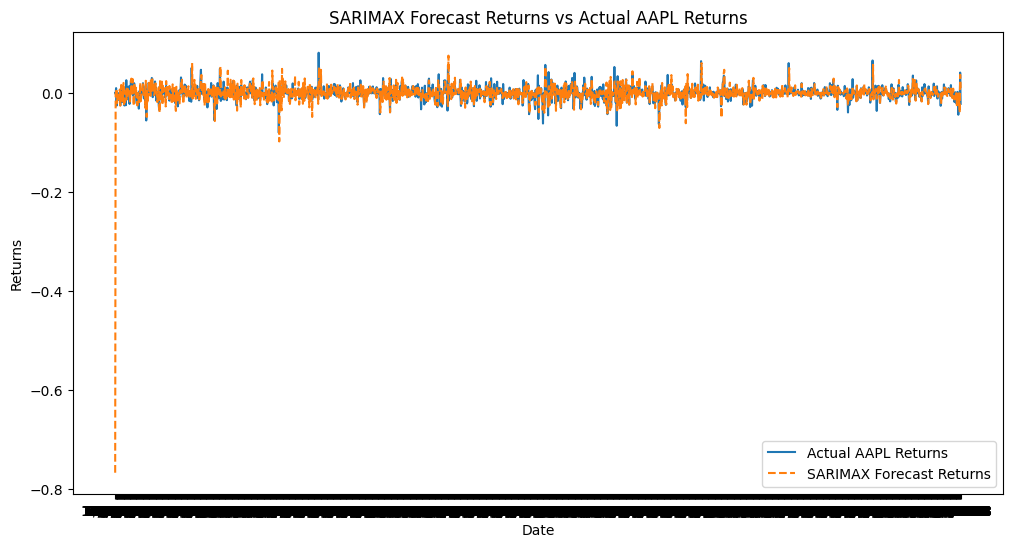

In [32]:
# Load the S&P 500 dataset
data = pd.read_csv(r'C:/P@i/Time Series Forecasting Assignment/sp500_close.csv', parse_dates=['Date'], index_col='Date')

# Load the economic indicators dataset
economic_indicators = pd.read_csv(r'C:/P@i/Time Series Forecasting Assignment/economic_indicators.csv', parse_dates=['Date'], index_col='Date')

# Forward fill and backward fill missing values
data = data.ffill().bfill()
economic_indicators = economic_indicators.ffill().bfill()

# Align the date ranges
economic_indicators = economic_indicators.reindex(data.index, method='ffill').bfill()

# Merge datasets
data = data.join(economic_indicators, how='inner')

# Check the combined dataset
print(data.head())

# Define the exogenous variables
exog_vars = data[['NASDAQ', 'Inflation_Rate']]

# Use auto_arima to find the best SARIMAX parameters for quarterly data
sarimax_model = auto_arima(data['AAPL'], exogenous=exog_vars, seasonal=True, m=4, trace=True, stepwise=True, suppress_warnings=True)

# Print the identified parameters
print(f"Identified SARIMAX parameters: {sarimax_model.order} and seasonal order: {sarimax_model.seasonal_order}")

# Extract the best SARIMAX parameters
order = sarimax_model.order
seasonal_order = sarimax_model.seasonal_order

# Fit the SARIMAX model
sarimax_fitted = SARIMAX(data['AAPL'], exog=exog_vars, order=order, seasonal_order=seasonal_order).fit()

# Forecast the values
sarimax_forecast = sarimax_fitted.fittedvalues

# Ensure consistent lengths by aligning
sarimax_actual, sarimax_forecast = data['AAPL'].align(sarimax_forecast, join='inner')

# Calculate daily returns for actual and forecasted SARIMAX prices
sarimax_actual_returns = sarimax_actual.pct_change().dropna()
sarimax_forecast_returns = sarimax_forecast.pct_change().dropna()

# Handle infinite or excessively large values
sarimax_actual_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
sarimax_forecast_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
sarimax_actual_returns.dropna(inplace=True)
sarimax_forecast_returns.dropna(inplace=True)

# Ensure alignment
sarimax_actual_returns, sarimax_forecast_returns = sarimax_actual_returns.align(sarimax_forecast_returns, join='inner')

# Evaluate the SARIMAX model's performance for returns
sarimax_mse_returns = mean_squared_error(sarimax_actual_returns, sarimax_forecast_returns)
sarimax_rmse_returns = np.sqrt(sarimax_mse_returns)
sarimax_mae_returns = mean_absolute_error(sarimax_actual_returns, sarimax_forecast_returns)

print(f'SARIMAX Model Returns MSE: {sarimax_mse_returns}')
print(f'SARIMAX Model Returns RMSE: {sarimax_rmse_returns}')
print(f'SARIMAX Model Returns MAE: {sarimax_mae_returns}')

# Plot the returns and compare them with the actual returns
plt.figure(figsize=(12, 6))
plt.plot(sarimax_actual_returns, label='Actual AAPL Returns')
plt.plot(sarimax_forecast_returns, label='SARIMAX Forecast Returns', linestyle='--')
plt.title('SARIMAX Forecast Returns vs Actual AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

Plot all Model in One Graph

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6159.823, Time=2.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6162.144, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6163.850, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6163.842, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6162.836, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6166.894, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6166.728, Time=1.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6161.584, Time=3.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6161.587, Time=4.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6165.807, Time=2.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6164.986, Time=1.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6164.732, Time=1.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6163.255, Time=3.34 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6160.631, Time=2.28 sec

Best model:  ARIMA(2,1,2)(0,0,0)

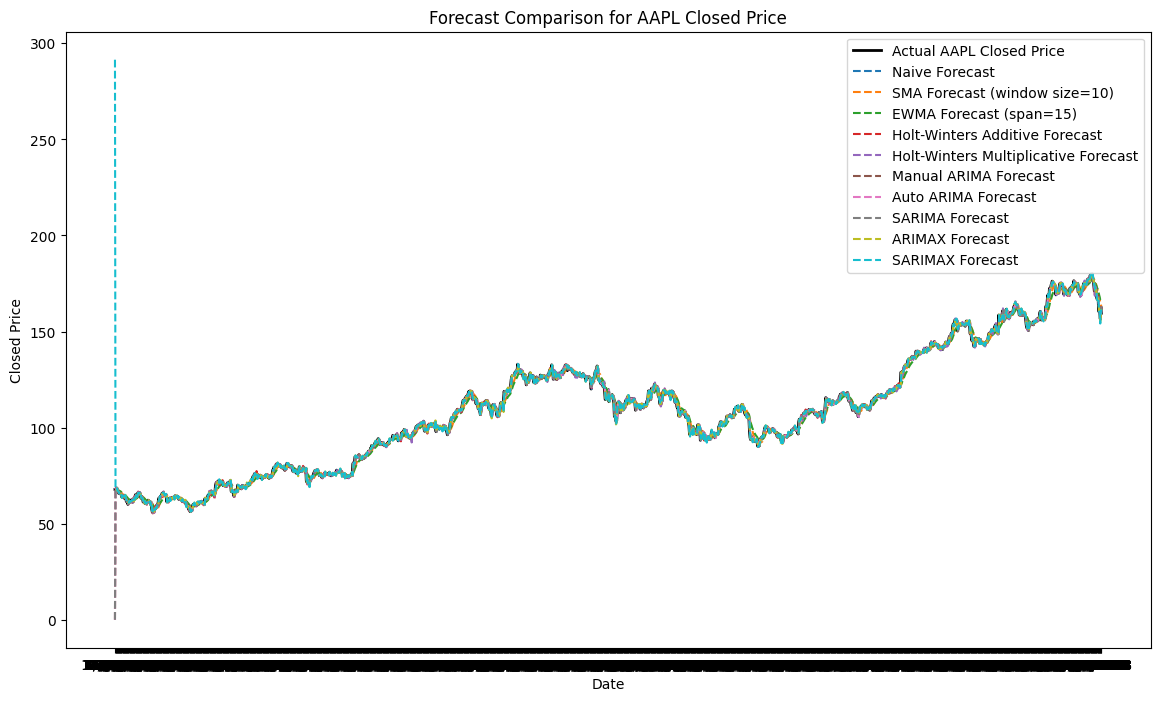

In [33]:
# Naive Forecast
naive_forecast = data['AAPL'].shift(1)

# Simple Moving Average (SMA)
window_size = 10
sma_forecast = data['AAPL'].rolling(window=window_size).mean()

# Exponentially Weighted Moving Average (EWMA)
ewma_span = 15
ewma_forecast = data['AAPL'].ewm(span=ewma_span, adjust=False).mean()

# Holt-Winters Model (Additive)
hw_additive = ExponentialSmoothing(data['AAPL'], seasonal='add', seasonal_periods=365).fit()
hw_additive_forecast = hw_additive.fittedvalues

# Holt-Winters Model (Multiplicative)
hw_multiplicative = ExponentialSmoothing(data['AAPL'], seasonal='mul', seasonal_periods=365).fit()
hw_multiplicative_forecast = hw_multiplicative.fittedvalues

# Manual ARIMA Model
p = 0
d = 1
q = 0
arima_model_manual = ARIMA(data['AAPL'], order=(p, d, q)).fit()
arima_forecast_manual = arima_model_manual.fittedvalues

# Auto ARIMA Model
auto_arima_model = auto_arima(data['AAPL'], seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
p, d, q = auto_arima_model.order
arima_model_auto = ARIMA(data['AAPL'], order=(p, d, q)).fit()
arima_forecast_auto = arima_model_auto.fittedvalues

# SARIMA Model (Quarterly Seasonality)
sarima_model = auto_arima(data['AAPL'], seasonal=True, m=4, trace=True, stepwise=True, suppress_warnings=True)
order = sarima_model.order
seasonal_order = sarima_model.seasonal_order
sarima_fitted = SARIMAX(data['AAPL'], order=order, seasonal_order=seasonal_order).fit()
sarima_forecast = sarima_fitted.fittedvalues

# Load the economic indicators dataset for ARIMAX and SARIMAX
economic_indicators = pd.read_csv(r'C:/P@i/Time Series Forecasting Assignment/economic_indicators.csv', parse_dates=['Date'], index_col='Date')
economic_indicators = economic_indicators.ffill().bfill()
economic_indicators = economic_indicators.reindex(data.index, method='ffill').bfill()
data = data.join(economic_indicators, how='inner', lsuffix='_data', rsuffix='_exog')
exog_vars = data[['NASDAQ_exog', 'Inflation_Rate_exog']]

# ARIMAX Model
arimax_model = auto_arima(data['AAPL'], exogenous=exog_vars, seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
p, d, q = arimax_model.order
arimax_model_fitted = ARIMA(data['AAPL'], exog=exog_vars, order=(p, d, q)).fit()
arimax_forecast = arimax_model_fitted.predict(start=data.index[d], end=data.index[-1], exog=exog_vars[d:])

# SARIMAX Model
sarimax_model = auto_arima(data['AAPL'], exogenous=exog_vars, seasonal=True, m=4, trace=True, stepwise=True, suppress_warnings=True)
order = sarimax_model.order
seasonal_order = sarimax_model.seasonal_order
sarimax_fitted = SARIMAX(data['AAPL'], exog=exog_vars, order=order, seasonal_order=seasonal_order).fit()
sarimax_forecast = sarimax_fitted.fittedvalues

# Plot all forecasts for comparison
plt.figure(figsize=(14, 8))
plt.plot(data['AAPL'], label='Actual AAPL Closed Price', color='black', linewidth=2)
plt.plot(naive_forecast, label='Naive Forecast', linestyle='--')
plt.plot(sma_forecast, label='SMA Forecast (window size=10)', linestyle='--')
plt.plot(ewma_forecast, label='EWMA Forecast (span=15)', linestyle='--')
plt.plot(hw_additive_forecast, label='Holt-Winters Additive Forecast', linestyle='--')
plt.plot(hw_multiplicative_forecast, label='Holt-Winters Multiplicative Forecast', linestyle='--')
plt.plot(arima_forecast_manual, label='Manual ARIMA Forecast', linestyle='--')
plt.plot(arima_forecast_auto, label='Auto ARIMA Forecast', linestyle='--')
plt.plot(sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.plot(arimax_forecast, label='ARIMAX Forecast', linestyle='--')
plt.plot(sarimax_forecast, label='SARIMAX Forecast', linestyle='--')
plt.title('Forecast Comparison for AAPL Closed Price')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.show()

Can select Start Date and End Date to analysis

DatePicker(value=datetime.date(2013, 2, 8), description='Start Date', step=1)

DatePicker(value=datetime.date(2018, 2, 7), description='End Date', step=1)

Button(description='Plot Forecasts', style=ButtonStyle())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=666.892, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=663.654, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=665.449, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=665.459, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=661.914, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=666.098, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.739 seconds


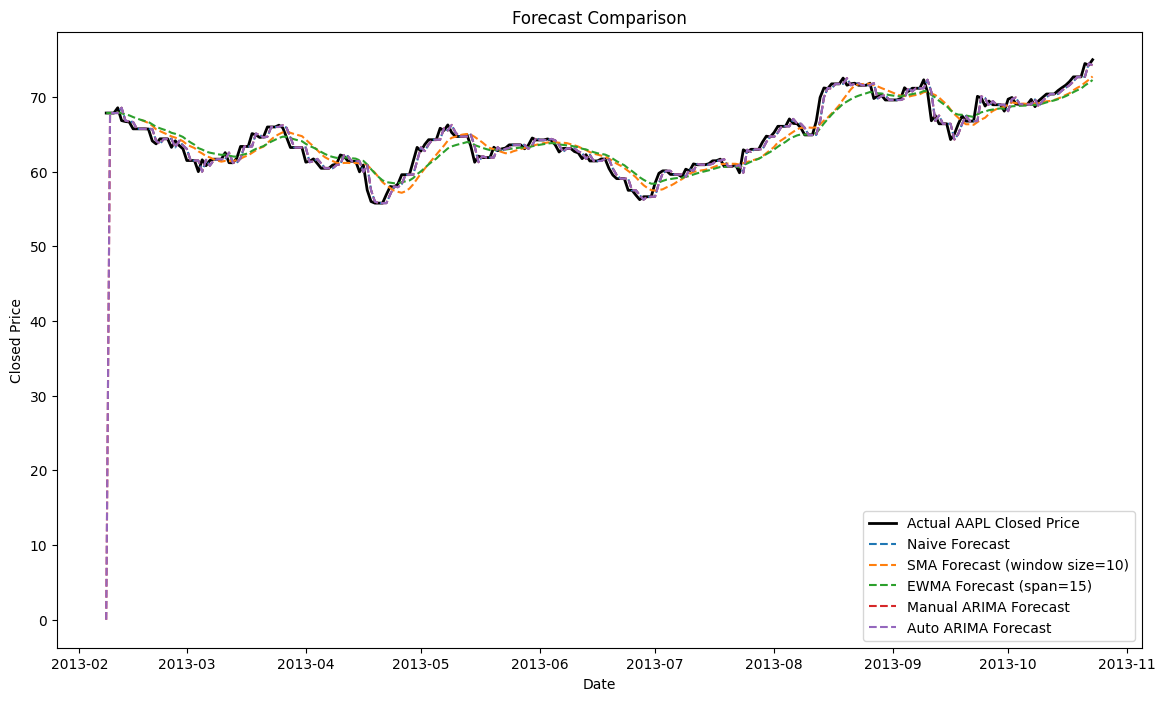

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from IPython.display import display
import ipywidgets as widgets

# Load the dataset, parse the date column, and set it as the index
data = pd.read_csv(r'C:/P@i/Time Series Forecasting Assignment/sp500_close.csv', parse_dates=['Date'], dayfirst=True, index_col='Date')
data.index.name = 'Date'
data = data.asfreq('D')  # Explicitly set the frequency to daily

# Forward fill and backward fill missing values
data = data.ffill().bfill()

# Define the forecasting functions
def naive_forecast(data):
    naive_forecast = data['AAPL'].shift(1)
    return naive_forecast

def sma_forecast(data, window_size=10):
    sma_forecast = data['AAPL'].rolling(window=window_size).mean()
    return sma_forecast

def ewma_forecast(data, span=15):
    ewma_forecast = data['AAPL'].ewm(span=span, adjust=False).mean()
    return ewma_forecast

def hw_forecast_additive(data):
    if len(data) < 730:  # Check if we have at least two full seasonal cycles for initialization
        return pd.Series(index=data.index, dtype=float)
    hw_additive = ExponentialSmoothing(data['AAPL'], seasonal='add', seasonal_periods=365).fit()
    return hw_additive.fittedvalues

def hw_forecast_multiplicative(data):
    if len(data) < 730:  # Check if we have at least two full seasonal cycles for initialization
        return pd.Series(index=data.index, dtype=float)
    hw_multiplicative = ExponentialSmoothing(data['AAPL'], seasonal='mul', seasonal_periods=365).fit()
    return hw_multiplicative.fittedvalues

def arima_forecast_manual(data, p=0, d=1, q=0):
    arima_model = ARIMA(data['AAPL'], order=(p, d, q)).fit()
    return arima_model.fittedvalues

def auto_arima_forecast(data):
    model = auto_arima(data['AAPL'], seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
    arima_model = ARIMA(data['AAPL'], order=model.order).fit()
    return arima_model.fittedvalues

def arimax_forecast(data, exog_vars):
    model = auto_arima(data['AAPL'], exogenous=exog_vars, seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
    arimax_model = ARIMA(data['AAPL'], exog=exog_vars, order=model.order).fit()
    return arimax_model.predict(start=data.index[1], end=data.index[-1], exog=exog_vars[1:])

def sarima_forecast(data, seasonal_periods=4):
    sarima_model = auto_arima(data['AAPL'], seasonal=True, m=seasonal_periods, trace=True, stepwise=True, suppress_warnings=True)
    sarima_fitted = SARIMAX(data['AAPL'], order=sarima_model.order, seasonal_order=sarima_model.seasonal_order).fit()
    return sarima_fitted.fittedvalues

def sarimax_forecast(data, exog_vars, seasonal_periods=4):
    sarimax_model = auto_arima(data['AAPL'], exogenous=exog_vars, seasonal=True, m=seasonal_periods, trace=True, stepwise=True, suppress_warnings=True)
    sarimax_fitted = SARIMAX(data['AAPL'], exog=exog_vars, order=sarimax_model.order, seasonal_order=sarimax_model.seasonal_order).fit()
    return sarimax_fitted.fittedvalues

# Plot forecasts function
def plot_forecasts(start_date, end_date):
    filtered_data = data.loc[start_date:end_date]

    plt.figure(figsize=(14, 8))
    plt.plot(filtered_data['AAPL'], label='Actual AAPL Closed Price', color='black', linewidth=2)
    plt.plot(filtered_data.index, naive_forecast(filtered_data), label='Naive Forecast', linestyle='--')
    plt.plot(filtered_data.index, sma_forecast(filtered_data), label='SMA Forecast (window size=10)', linestyle='--')
    plt.plot(filtered_data.index, ewma_forecast(filtered_data), label='EWMA Forecast (span=15)', linestyle='--')
    
    if len(filtered_data) >= 730:
        plt.plot(filtered_data.index, hw_forecast_additive(filtered_data), label='Holt-Winters Additive Forecast', linestyle='--')
        plt.plot(filtered_data.index, hw_forecast_multiplicative(filtered_data), label='Holt-Winters Multiplicative Forecast', linestyle='--')
    
    plt.plot(filtered_data.index, arima_forecast_manual(filtered_data), label='Manual ARIMA Forecast', linestyle='--')
    plt.plot(filtered_data.index, auto_arima_forecast(filtered_data), label='Auto ARIMA Forecast', linestyle='--')

    # Ensure economic indicators data is loaded before calling ARIMAX or SARIMAX
    if 'NASDAQ_exog' in data.columns and 'Inflation_Rate_exog' in data.columns:
        exog_vars = filtered_data[['NASDAQ_exog', 'Inflation_Rate_exog']]
        plt.plot(filtered_data.index, arimax_forecast(filtered_data, exog_vars), label='ARIMAX Forecast', linestyle='--')
        plt.plot(filtered_data.index, sarima_forecast(filtered_data, seasonal_periods=4), label='SARIMA Forecast', linestyle='--')
        plt.plot(filtered_data.index, sarimax_forecast(filtered_data, exog_vars, seasonal_periods=4), label='SARIMAX Forecast', linestyle='--')

    plt.title('Forecast Comparison')
    plt.xlabel('Date')
    plt.ylabel('Closed Price')
    plt.legend()
    plt.show()

# Create widgets for selecting date range
start_date_picker = widgets.DatePicker(description='Start Date', value=pd.to_datetime(data.index.min(), dayfirst=True).date())
end_date_picker = widgets.DatePicker(description='End Date', value=pd.to_datetime(data.index.max(), dayfirst=True).date())
plot_button = widgets.Button(description="Plot Forecasts")

# Define the on_button_click function
def on_button_click(b):
    start_date = pd.to_datetime(start_date_picker.value, dayfirst=True)
    end_date = pd.to_datetime(end_date_picker.value, dayfirst=True)
    plot_forecasts(start_date, end_date)

# Set the button's on_click behavior
plot_button.on_click(on_button_click)

# Display widgets
display(start_date_picker, end_date_picker, plot_button)
